![](img/banner.png)
%%HTML
<script src="require.js"></script>

# Linear models
**Basics of modeling, optimization, and regularization**


**Mahmood Amintoosi, Spring 2025**

Computer Science Dept, Ferdowsi University of Mashhad

I should mention that the original material of this course was from [Open Machine Learning Course](https://ml-course.github.io/), by [Joaquin Vanschoren](https://github.com/joaquinvanschoren) and others.

In [7]:
# Auto-setup when running on Google Colab
import os
if 'google.colab' in str(get_ipython()) and not os.path.exists('/content/machine-learning'):
    !git clone -q https://github.com/fum-cs/machine-learning.git /content/machine-learning
    !pip --quiet install -r /content/machine-learning/requirements_colab.txt
    %cd machine-learning/notebooks

# Global imports and settings
%matplotlib inline
from preamble import *
interactive = False # Set to True for interactive plots
if interactive:
    fig_scale = 0.5
    plt.rcParams.update(print_config)
else: # For printing
    fig_scale = 0.3
    plt.rcParams.update(print_config)

## Notation and Definitions 
* A _scalar_ is a simple numeric value, denoted by an italic letter: $x=3.24$
* A _vector_ is a 1D ordered array of _n_ scalars, denoted by a bold letter: $\mathbf{x}=[3.24, 1.2]$
    * $x_i$ denotes the $i$th element of a vector, thus $x_0 = 3.24$.
        * Note: some other courses use $x^{(i)}$ notation
* A _set_ is an _unordered_ collection of unique elements, denote by caligraphic capital: $\mathcal{S}=\{3.24, 1.2\}$
* A _matrix_ is a 2D array of scalars, denoted by bold capital: $\mathbf{X}=\begin{bmatrix}
3.24 & 1.2 \\
2.24 & 0.2 
\end{bmatrix}$
    * $\textbf{X}_{i}$ denotes the $i$th _row_ of the matrix
    * $\textbf{X}_{:,j}$ denotes the $j$th _column_
    * $\textbf{X}_{i,j}$ denotes the _element_ in the $i$th row, $j$th column, thus $\mathbf{X}_{1,0} = 2.24$

* $\mathbf{X}^{n \times p}$, an $n \times p$ matrix, can represent $n$ data points in a $p$-dimensional space 
    * Every row is a vector that can represent a _point_ in an p-dimensional space, given a _basis_.
    * The _standard basis_ for a Euclidean space is the set of unit vectors
* E.g. if $\mathbf{X}=\begin{bmatrix}
3.24 & 1.2 \\
2.24 & 0.2 \\
3.0 & 0.6 
\end{bmatrix}$

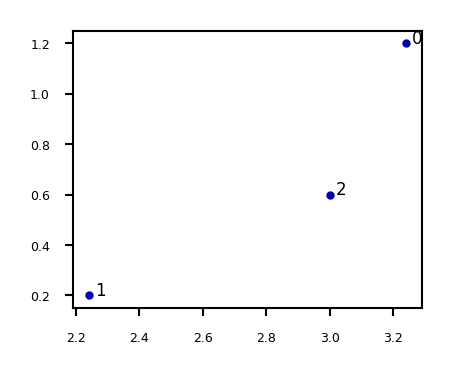

In [8]:
X = np.array([[3.24 , 1.2 ],[2.24, 0.2],[3.0 , 0.6 ]]) 
fig = plt.figure(figsize=(5*fig_scale,4*fig_scale))
plt.scatter(X[:,0],X[:,1])
for i in range(3):
    plt.annotate(i, (X[i,0]+0.02, X[i,1]))

* A _tensor_ is an _k_-dimensional array of data, denoted by an italic capital: $T$
    * _k_ is also called the order, degree, or rank
    * $T_{i,j,k,...}$ denotes the element or sub-tensor in the corresponding position
    * A set of color images can be represented by:
        * a 4D tensor (sample x height x width x color channel)
        * a 2D tensor (sample x flattened vector of pixel values)

![](img/08_images.png)

### Basic operations
* Sums and products are denoted by capital Sigma and capital Pi:

$$\sum_{i=0}^{p} = x_0 + x_1 + ... + x_p \quad \prod_{i=0}^{p} = x_0 \cdot x_1 \cdot ... \cdot x_p$$

* Operations on vectors are element-wise: e.g. $\mathbf{x}+\mathbf{z} = [x_0+z_0,x_1+z_1, ... , x_p+z_p]$
* Dot product $\mathbf{w}\mathbf{x} = \mathbf{w} \cdot \mathbf{x} = \mathbf{w}^{T} \mathbf{x} = \sum_{i=0}^{p} w_i \cdot x_i = w_0 \cdot x_0 + w_1 \cdot x_1 + ... + w_p \cdot x_p$
* Matrix product $\mathbf{W}\mathbf{x} = \begin{bmatrix}
\mathbf{w_0} \cdot \mathbf{x} \\
... \\
\mathbf{w_p} \cdot \mathbf{x} \end{bmatrix}$
* A function $f(x) = y$ relates an input element $x$ to an output $y$
    * It has a _local minimum_ at $x=c$ if $f(x) \geq f(c)$ in interval $(c-\epsilon, c+\epsilon)$
    * It has a _global minimum_ at $x=c$ if $f(x) \geq f(c)$ for any value for $x$
* A vector function consumes an input and produces a vector: $\mathbf{f}(\mathbf{x}) = \mathbf{y}$
* $\underset{x\in X}{\operatorname{max}}f(x)$ returns the largest value f(x) for any x
* $\underset{x\in X}{\operatorname{argmax}}f(x)$ returns the element x that maximizes f(x)

### Gradients
* A _derivative_ $f'$ of a function $f$ describes how fast $f$ grows or decreases
* The process of finding a derivative is called differentiation
    * Derivatives for basic functions are known
    * For non-basic functions we use the chain rule: $F(x) = f(g(x)) \rightarrow F'(x)=f'(g(x))g'(x)$
* A function is _differentiable_ if it has a derivative in any point of it's domain
    * It's _continuously differentiable_ if $f'$ is a continuous function
    * We say $f$ is _smooth_ if it is _infinitely differentiable_, i.e., $f', f'', f''', ...$ all exist
* A _gradient_ $\nabla f$ is the derivative of a function in multiple dimensions
    * It is a vector of partial derivatives: $\nabla f = \left[ \frac{\partial f}{\partial x_0}, \frac{\partial f}{\partial x_1},... \right]$
    * E.g. $f=2x_0+3x_1^{2}-\sin(x_2) \rightarrow \nabla f= [2, 6x_1, -cos(x_2)]$

* Example: $f = -(x_0^2+x_1^2)$
    * $\nabla f = \left[\frac{\partial f}{\partial x_0},\frac{\partial f}{\partial x_1}\right] = \left[-2x_0,-2x_1\right]$
    * Evaluated at point (-4,1): $\nabla f(-4,1) = [8,-2]$
        * These are the slopes at point (-4,1) in the direction of $x_0$ and $x_1$ respectively

In [9]:
from mpl_toolkits import mplot3d
import ipywidgets as widgets
from ipywidgets import interact, interact_manual

# f = -(x0^2 + x1^2)
def g_f(x0, x1):
    return -(x0 ** 2 + x1 ** 2)
def g_dfx0(x0):
    return -2 * x0
def g_dfx1(x1):
    return -2 * x1

@interact
def plot_gradient(rotation=(0,240,10)):
    # plot surface of f
    fig = plt.figure(figsize=(12*fig_scale,5*fig_scale))
    ax = plt.axes(projection="3d")
    x0 = np.linspace(-6, 6, 30)
    x1 = np.linspace(-6, 6, 30)
    X0, X1 = np.meshgrid(x0, x1)
    ax.plot_surface(X0, X1, g_f(X0, X1), rstride=1, cstride=1,
                    cmap='winter', edgecolor='none',alpha=0.3)

    # choose point to evaluate: (-4,1)
    i0 = -4
    i1 = 1
    iz = np.linspace(g_f(i0,i1), -82, 30)
    ax.scatter3D(i0, i1, g_f(i0,i1), c="k", s=20*fig_scale,label='($i_0$,$i_1$) = (-4,1)')
    ax.plot3D([i0]*30, [i1]*30, iz, linewidth=1*fig_scale, c='silver', linestyle='-')
    ax.set_zlim(-80,0)

    # plot intersects
    ax.plot3D(x0,[1]*30,g_f(x0, 1),linewidth=3*fig_scale,alpha=0.9,label='$f(x_0,i_1)$',c='r',linestyle=':')
    ax.plot3D([-4]*30,x1,g_f(-4, x1),linewidth=3*fig_scale,alpha=0.9,label='$f(i_0,x_1)$',c='b',linestyle=':')

    # df/dx0 is slope of line at the intersect point
    x0 = np.linspace(-8, 0, 30)
    ax.plot3D(x0,[1]*30,g_dfx0(i0)*x0-g_f(i0,i1),linewidth=3*fig_scale,label=r'$\frac{\partial f}{\partial x_0}(i_0,i_1) x_0 + f(i_0,i_1)$',c='r',linestyle='-')
    ax.plot3D([-4]*30,x1,g_dfx1(i1)*x1+g_f(i0,i1),linewidth=3*fig_scale,label=r'$\frac{\partial f}{\partial x_1}(i_0,i_1) x_1 + f(i_0,i_1)$',c='b',linestyle='-')

    ax.set_xlabel('x0', labelpad=-4/fig_scale)
    ax.set_ylabel('x1', labelpad=-4/fig_scale)
    ax.get_zaxis().set_ticks([])
    ax.view_init(30, rotation) # Use this to rotate the figure
    ax.legend()
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    ax.tick_params(axis='both', width=0, labelsize=10*fig_scale, pad=-6)

    plt.tight_layout()
    plt.show()

interactive(children=(IntSlider(value=120, description='rotation', max=240, step=10), Output()), _dom_classes=…

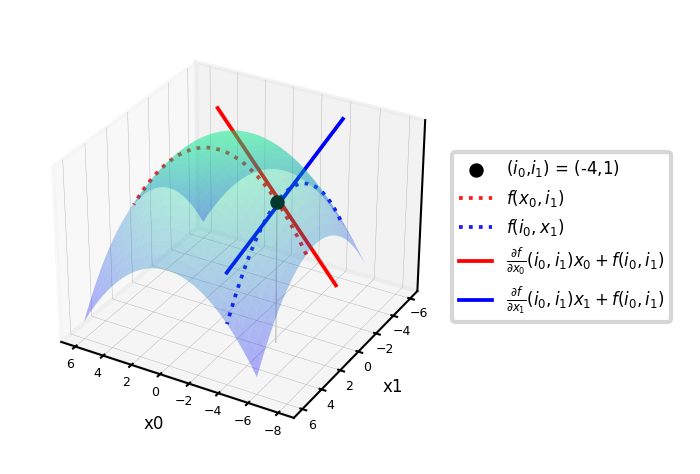

In [10]:
if not interactive:
    plot_gradient(rotation=120)

### Distributions and Probabilities
* The normal (Gaussian) distribution with mean $\mu$ and standard deviation $\sigma$ is noted as $N(\mu,\sigma)$
* A random variable $X$ can be continuous or discrete
* A probability distribution $f_X$ of a continuous variable $X$: _probability density function_ (pdf)
    * The _expectation_ is given by $\mathbb{E}[X] = \int x f_{X}(x) dx$
* A probability distribution of a discrete variable: _probability mass function_ (pmf)
    * The _expectation_ (or mean) $\mu_X = \mathbb{E}[X] = \sum_{i=1}^k[x_i \cdot Pr(X=x_i)]$

![](img/02_pdf.png)

# Linear models
Linear models make a prediction using a linear function of the input features $X$ 

$$f_{\mathbf{w}}(\mathbf{x}) = \sum_{i=1}^{p} w_i \cdot x_i + w_{0}$$

Learn $w$ from $X$, given a loss function $\mathcal{L}$:

$$\underset{\mathbf{w}}{\operatorname{argmin}} \mathcal{L}(f_\mathbf{w}(X))$$

* Many algorithms with different $\mathcal{L}$: Least squares, Ridge, Lasso, Logistic Regression, Linear SVMs,...
* Can be very powerful (and fast), especially for large datasets with many features.
* Can be generalized to learn non-linear patterns: _Generalized Linear Models_
    * Features can be augmentented with polynomials of the original features
    * Features can be transformed according to a distribution (Poisson, Tweedie, Gamma,...)
    * Some linear models (e.g. SVMs) can be _kernelized_ to learn non-linear functions

## Linear models for regression
* Prediction formula for input features x:
    * $w_1$ ... $w_p$ usually called _weights_ or _coefficients_ , $w_0$ the _bias_ or _intercept_
    * Assumes that errors are $N(0,\sigma)$

$$\hat{y} = \mathbf{w}\mathbf{x} + w_0 = \sum_{i=1}^{p} w_i \cdot x_i + w_0 = w_1 \cdot x_1 + w_2 \cdot x_2 + ... + w_p \cdot x_p + w_0 $$

w_1: 0.393906  w_0: -0.031804


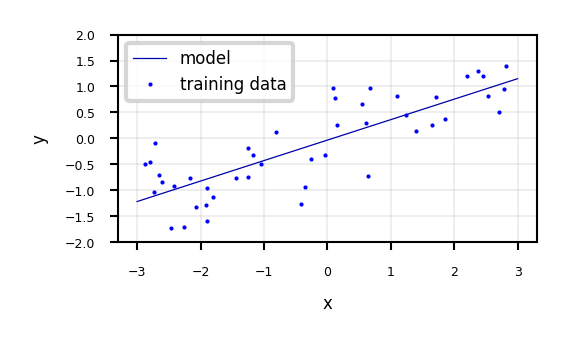

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from mglearn.datasets import make_wave

Xw, yw = make_wave(n_samples=60)
Xw_train, Xw_test, yw_train, yw_test = train_test_split(Xw, yw, random_state=42)

line = np.linspace(-3, 3, 100).reshape(-1, 1)

lr = LinearRegression().fit(Xw_train, yw_train)
print("w_1: %f  w_0: %f" % (lr.coef_[0], lr.intercept_))

plt.figure(figsize=(6*fig_scale, 3*fig_scale))
plt.plot(line, lr.predict(line), lw=fig_scale)
plt.plot(Xw_train, yw_train, 'o', c='b')
#plt.plot(X_test, y_test, '.', c='r')
ax = plt.gca()
ax.grid(True)
ax.set_ylim(-2, 2)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend(["model", "training data"], loc="best");

### Linear Regression (aka Ordinary Least Squares)
* Loss function is the _sum of squared errors_ (SSE) (or residuals) between predictions $\hat{y}_i$ (red) and the true regression targets $y_i$ (blue) on the training set.

$$\mathcal{L}_{SSE} = \sum_{n=1}^{N} (y_n-\hat{y}_n)^2 = \sum_{n=1}^{N} (y_n-(\mathbf{w}\mathbf{x_n} + w_0))^2$$ 

![](img/02_least_squares.png)

#### Solving ordinary least squares

**Closed-Form Solution**
* Convex optimization problem with unique closed-form solution:
    
    $$w^{*} = (X^{T}X)^{-1} X^T \mathbf{y}$$
    
    * Add a column of 1's to the front of X to get $w_0$
    * Slow. Time complexity is quadratic in number of features: $\mathcal{O}(p^2n)$
        * X has $n$ rows, $p$ features, hence $X^{T}X$ has dimensionality $p \cdot p$
    * Only works if $n>p$

*Overfitting Risks of Closed-Form Solution*

- **The closed-form solution of Ordinary Least Squares (OLS) is highly prone to overfitting**, especially when applied to small or highly correlated datasets.
- **Large coefficients**: In the absence of regularization, weights $ w $ can grow excessively, leading to unstable predictions.
- **Sensitive to input variations**: Small changes in $ x $ may result in disproportionately large shifts in the output $ y $, making the model unreliable.
- **No direct hyperparameter control**: Unlike Gradient Descent, OLS lacks tuning mechanisms such as learning rate or regularization strength.

**Gradient Descent**
- More efficient for **large-scale** or **high-dimensional** datasets.
- Preferred when computing $ X^{T}X $ is infeasible or excessively time-consuming due to large $ p $ or $ n $.
- Offers multiple tunable settings to control the learning process, including:
  - **Learning Rate**: Adjusts update speed to balance stability and convergence.
  - **Regularization**: Options like L1, L2, or Elastic Net mitigate overfitting.
  - **Batch Size**: Influences computational efficiency (Stochastic, Mini-batch, Full-batch).
  - **Iterations**: Determines the number of passes over the dataset.
  - **Momentum & Decay**: Helps stabilize and refine the learning trajectory.


---
 
#### **Why $ X^T X $ is Singular When $ n < p $?**  

For a design matrix $ X \in \mathbb{R}^{n \times p} $:  
1. **Rank Constraint**:  
   - $\text{rank}(X) \leq \min(n, p)$.  
   - If $ n < p $, $\text{rank}(X) \leq n < p $, so $ X $ is **column-rank-deficient**.  

2. **Gram Matrix $ X^T X $**:  
   - $ X^T X \in \mathbb{R}^{p \times p} $ has the same rank as $ X $:  
  
     $$
     \text{rank}(X^T X) = \text{rank}(X) < p.
     $$  
   - Thus, $ X^T X $ is **singular** (non-invertible).  

3. **Null Space Argument**:  
   - $\text{null}(X) = \text{null}(X^T X)$ (since $ X^T X \mathbf{v} = 0 \iff X \mathbf{v} = 0 $).  
   - If $ n < p $, $\text{nullity}(X) = p - \text{rank}(X) \geq p - n > 0 $, meaning there exist non-zero $ \mathbf{v} $ such that $ X^T X \mathbf{v} = 0 $.  

4. **Geometric Intuition**:  
   - $ X $ maps $ \mathbb{R}^p \to \mathbb{R}^n $ with $ p > n $, implying **linear dependence** in its columns.  
   - $ X^T X $’s singularity reflects this dependence, making OLS’s $ (X^T X)^{-1} $ undefined.  

5. **Implications**:  
   - **OLS fails**: $ \mathbf{w}^* = (X^T X)^{-1} X^T \mathbf{y} $ cannot be computed.  
   - **Solutions**:  
     - **Regularization**: Ridge Regression adds $ \lambda I $ to ensure invertibility.  
     - **Dimensionality Reduction**: Use PCA or feature selection to reduce $ p $.  

For further information please See {cite}`Bakhshali2018Sparse`.

---

In [1]:
import numpy as np

# Example with n=2, p=3 (n < p)
X = np.array([[1, 2, 3],
              [4, 5, 6]])  # 2x3 matrix (n=2, p=3)

# Compute X^T X
XTX = np.dot(X.T, X)  # or X.T @ X

print("X (design matrix):")
print(X)
print("\nX^T X (Gram matrix):")
print(XTX)

# Check singularity
rank_X = np.linalg.matrix_rank(X)
rank_XTX = np.linalg.matrix_rank(XTX)
is_singular = rank_XTX < XTX.shape[0]  # True if singular

print("\nRank of X:", rank_X)
print("Rank of X^T X:", rank_XTX)
print("Is X^T X singular?", is_singular)

# Attempt to invert (will fail)
try:
    np.linalg.inv(XTX)
except np.linalg.LinAlgError:
    print("\nError: X^T X is singular and cannot be inverted (as expected when n < p).")

X (design matrix):
[[1 2 3]
 [4 5 6]]

X^T X (Gram matrix):
[[17 22 27]
 [22 29 36]
 [27 36 45]]

Rank of X: 2
Rank of X^T X: 2
Is X^T X singular? True

Error: X^T X is singular and cannot be inverted (as expected when n < p).


#### Gradient Descent
* Start with an initial, random set of weights: $\mathbf{w}^0$
* Given a differentiable loss function $\mathcal{L}$ (e.g. $\mathcal{L}_{SSE}$), compute $\nabla \mathcal{L}$
* For least squares: $\frac{\partial \mathcal{L}_{SSE}}{\partial w_i}(\mathbf{w}) = -2\sum_{n=1}^{N} (y_n-\hat{y}_n) x_{n,i}$
    * If feature $X_{:,i}$ is associated with big errors, the gradient wrt $w_i$ will be large
* Update _all_ weights slightly (by _step size_ or _learning rate_ $\eta$) in 'downhill' direction.
* Basic _update rule_ (step s): 

    $$\mathbf{w}^{s+1} = \mathbf{w}^s-\eta\nabla \mathcal{L}(\mathbf{w}^s)$$

![](img/01_gradient_descent.jpg)

* Important hyperparameters
    * Learning rate
        * Too small: slow convergence. Too large: possible divergence
    * Maximum number of iterations
        * Too small: no convergence. Too large: wastes resources
    * Learning rate decay with decay rate $k$
        * E.g. exponential ($\eta^{s+1} = \eta^{0}  e^{-ks}$), inverse-time ($\eta^{s+1} = \frac{\eta^{s}}{1+ks}$),...
    * Many more advanced ways to control learning rate (see later)
        * Adaptive techniques: depend on how much loss improved in previous step

interactive(children=(FloatSlider(value=0.2, description='learn_rate', max=0.4, min=0.01, step=0.01), Checkbox…

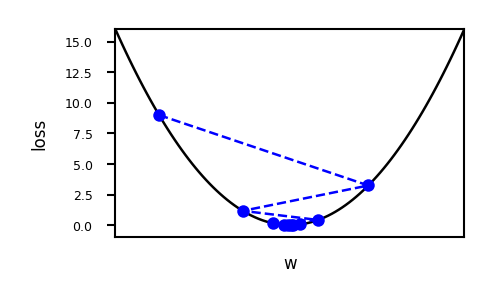

In [13]:
import math
# Some convex function to represent the loss
def l_fx(x):
    return (x * 4)**2 
# Derivative to compute the gradient
def l_dfx0(x0):
    return 8 * x0

@interact
def plot_learning_rate(learn_rate=(0.01,0.4,0.01), exp_decay=False):
    w = np.linspace(-1,1,101)
    f = [l_fx(i) for i in w]
    w_current = -0.75
    learn_rate_current = learn_rate
    fw = [] # weight values
    fl = [] # loss values
    for i in range(10):
        fw.append(w_current)
        fl.append(l_fx(w_current))
        # Decay
        if exp_decay:
            learn_rate_current = learn_rate * math.exp(-0.3*i)
        # Update rule
        w_current = w_current - learn_rate_current * l_dfx0(w_current)
    fig, ax = plt.subplots(figsize=(5*fig_scale,3*fig_scale))
    ax.set_xlabel('w')
    ax.set_xticks([])
    ax.set_ylabel('loss')
    ax.plot(w, f, lw=2*fig_scale, ls='-', c='k', label='Loss')
    ax.plot(fw, fl, '--bo', lw=2*fig_scale, markersize=3)
    plt.ylim(-1,16)
    plt.xlim(-1,1)

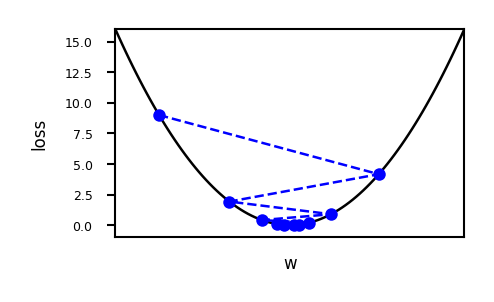

In [14]:
if not interactive:
    plot_learning_rate(learn_rate=0.21, exp_decay=False)

In [15]:
import tensorflow as tf
# import tensorflow_addons as tfa

# Toy surface
def f(x, y):
    return (1.5 - x + x*y)**2 + (2.25 - x + x*y**2)**2 + (2.625 - x + x*y**3)**2

# Tensorflow optimizers
sgd = tf.optimizers.SGD(0.01)
lr_schedule = tf.optimizers.schedules.ExponentialDecay(0.02,decay_steps=100,decay_rate=0.96)
sgd_decay = tf.optimizers.SGD(learning_rate=lr_schedule)

optimizers = [sgd, sgd_decay]
opt_names = ['sgd', 'sgd_decay']
cmap = plt.cm.get_cmap('tab10')
colors = [cmap(x/10) for x in range(10)]

# Training
all_paths = []
for opt, name in zip(optimizers, opt_names):
    x = tf.Variable(0.8)
    y = tf.Variable(1.6)

    x_history = []
    y_history = []
    loss_prev = 0.0
    max_steps = 100
    for step in range(max_steps):
        with tf.GradientTape() as g:
            loss = f(x, y)
            x_history.append(x.numpy())
            y_history.append(y.numpy())
            grads = g.gradient(loss, [x, y])
            opt.apply_gradients(zip(grads, [x, y]))

    if np.abs(loss_prev - loss.numpy()) < 1e-6:
        break
    loss_prev = loss.numpy()
    x_history = np.array(x_history)
    y_history = np.array(y_history)
    path = np.concatenate((np.expand_dims(x_history, 1), np.expand_dims(y_history, 1)), axis=1).T
    all_paths.append(path)

In [16]:
from matplotlib.colors import LogNorm
import tensorflow as tf

# Toy surface
def f(x, y):
    return (1.5 - x + x*y)**2 + (2.25 - x + x*y**2)**2 + (2.625 - x + x*y**3)**2

# Tensorflow optimizers
sgd = tf.optimizers.SGD(0.01)
lr_schedule = tf.optimizers.schedules.ExponentialDecay(0.02,decay_steps=100,decay_rate=0.96)
sgd_decay = tf.optimizers.SGD(learning_rate=lr_schedule)

optimizers = [sgd, sgd_decay]
opt_names = ['sgd', 'sgd_decay']
cmap = plt.cm.get_cmap('tab10')
colors = [cmap(x/10) for x in range(10)]

# Training
all_paths = []
for opt, name in zip(optimizers, opt_names):
    x_init = 0.8
    x = tf.Variable(x_init)
    y_init = 1.6
    y = tf.Variable(y_init)

    x_history = []
    y_history = []
    z_prev = 0.0
    max_steps = 100
    for step in range(max_steps):
        with tf.GradientTape() as g:
            z = f(x, y)
            x_history.append(x.numpy())
            y_history.append(y.numpy())
            dz_dx, dz_dy = g.gradient(z, [x, y])
            opt.apply_gradients(zip([dz_dx, dz_dy], [x, y]))

    if np.abs(z_prev - z.numpy()) < 1e-6:
        break
    z_prev = z.numpy()
    x_history = np.array(x_history)
    y_history = np.array(y_history)
    path = np.concatenate((np.expand_dims(x_history, 1), np.expand_dims(y_history, 1)), axis=1).T
    all_paths.append(path)
        
# Plotting
number_of_points = 50
margin = 4.5
minima = np.array([3., .5])
minima_ = minima.reshape(-1, 1)
x_min = 0. - 2
x_max = 0. + 3.5
y_min = 0. - 3.5
y_max = 0. + 2
x_points = np.linspace(x_min, x_max, number_of_points) 
y_points = np.linspace(y_min, y_max, number_of_points)
x_mesh, y_mesh = np.meshgrid(x_points, y_points)
z = np.array([f(xps, yps) for xps, yps in zip(x_mesh, y_mesh)])

def plot_optimizers(ax, iterations, optimizers):
    ax.contour(x_mesh, y_mesh, z, levels=np.logspace(-0.5, 5, 25), norm=LogNorm(), cmap=plt.cm.jet, linewidths=fig_scale, zorder=-1)
    ax.plot(*minima, 'r*', markersize=20*fig_scale)
    for name, path, color in zip(opt_names, all_paths, colors):
        if name in optimizers:
            p = path[:,:iterations]
            ax.plot([], [], color=color, label=name, lw=3*fig_scale, linestyle='-')
            ax.quiver(p[0,:-1], p[1,:-1], p[0,1:]-p[0,:-1], p[1,1:]-p[1,:-1], scale_units='xy', angles='xy', scale=1, color=color, lw=4)


    ax.set_xlim((x_min, x_max))
    ax.set_ylim((y_min, y_max))
    ax.legend(loc='lower left', prop={'size': 15*fig_scale}) 
    ax.set_xticks([])
    ax.set_yticks([])
    plt.tight_layout()

In [17]:
from decimal import *

# Training for momentum
all_lr_paths = []
lr_range = [0.005 * i for i in range(0,10)]
for lr in lr_range:
    opt = tf.optimizers.SGD(lr, nesterov=False)

    x_init = 0.8
    x = tf.compat.v1.get_variable('x', dtype=tf.float32, initializer=tf.constant(x_init))
    y_init = 1.6
    y = tf.compat.v1.get_variable('y', dtype=tf.float32, initializer=tf.constant(y_init))

    x_history = []
    y_history = []
    z_prev = 0.0
    max_steps = 100
    for step in range(max_steps):
        with tf.GradientTape() as g:
            z = f(x, y)
            x_history.append(x.numpy())
            y_history.append(y.numpy())
            dz_dx, dz_dy = g.gradient(z, [x, y])
            opt.apply_gradients(zip([dz_dx, dz_dy], [x, y]))

    if np.abs(z_prev - z.numpy()) < 1e-6:
        break
    z_prev = z.numpy()
    x_history = np.array(x_history)
    y_history = np.array(y_history)
    path = np.concatenate((np.expand_dims(x_history, 1), np.expand_dims(y_history, 1)), axis=1).T
    all_lr_paths.append(path)
    
# Plotting
number_of_points = 50
margin = 4.5
minima = np.array([3., .5])
minima_ = minima.reshape(-1, 1)
x_min = 0. - 2
x_max = 0. + 3.5
y_min = 0. - 3.5
y_max = 0. + 2
x_points = np.linspace(x_min, x_max, number_of_points) 
y_points = np.linspace(y_min, y_max, number_of_points)
x_mesh, y_mesh = np.meshgrid(x_points, y_points)
z = np.array([f(xps, yps) for xps, yps in zip(x_mesh, y_mesh)])

def plot_learning_rate_optimizers(ax, iterations, lr):
    ax.contour(x_mesh, y_mesh, z, levels=np.logspace(-0.5, 5, 25), norm=LogNorm(), cmap=plt.cm.jet, linewidths=fig_scale, zorder=-1)
    ax.plot(*minima, 'r*', markersize=20*fig_scale)
    for path, lrate in zip(all_lr_paths, lr_range):
        if round(lrate,3) == lr:
            p = path[:,:iterations]
            ax.plot([], [], color='b', label="Learning rate {}".format(lr), lw=3*fig_scale, linestyle='-')
            ax.quiver(p[0,:-1], p[1,:-1], p[0,1:]-p[0,:-1], p[1,1:]-p[1,:-1], scale_units='xy', angles='xy', scale=1, color='b', lw=4)


    ax.set_xlim((x_min, x_max))
    ax.set_ylim((y_min, y_max))
    ax.legend(loc='lower left', prop={'size': 15*fig_scale}) 
    ax.set_xticks([])
    ax.set_yticks([])
    plt.tight_layout()

**Effect of learning rate**

interactive(children=(IntSlider(value=50, description='iterations', min=1), FloatSlider(value=0.025, descripti…

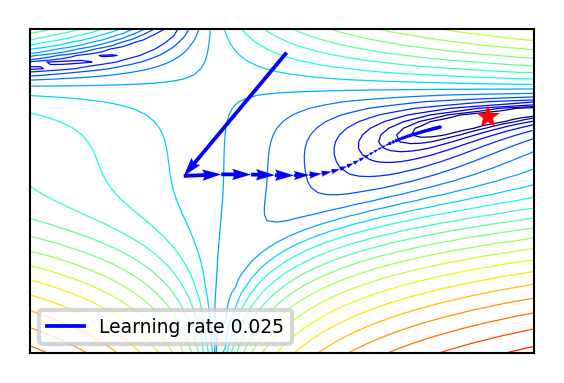

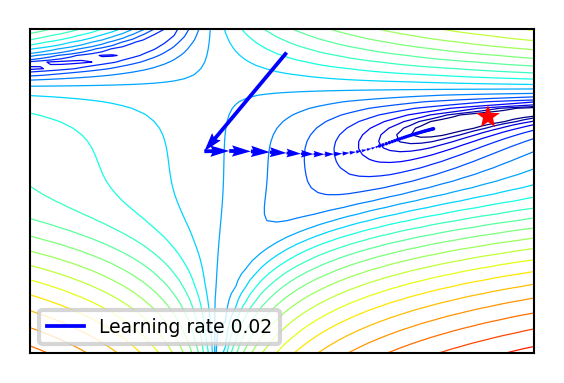

In [18]:
@interact
def plot_lr(iterations=(1,100,1), learning_rate=(0.01,0.04,0.005)):
    fig, ax = plt.subplots(figsize=(6*fig_scale,4*fig_scale))
    plot_learning_rate_optimizers(ax,iterations,learning_rate)
    
if not interactive:
    plot_lr(iterations=50, learning_rate=0.02)

**Effect of learning rate decay**

interactive(children=(IntSlider(value=50, description='iterations', min=1), Dropdown(description='optimizer1',…

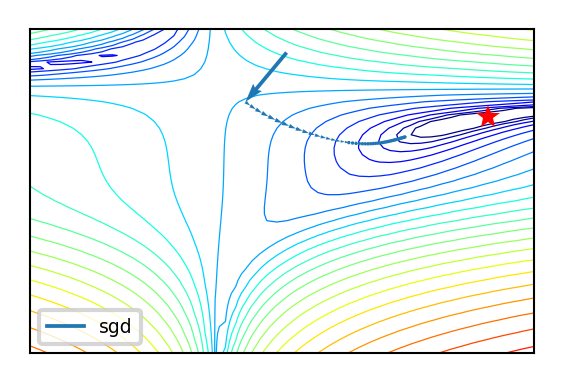

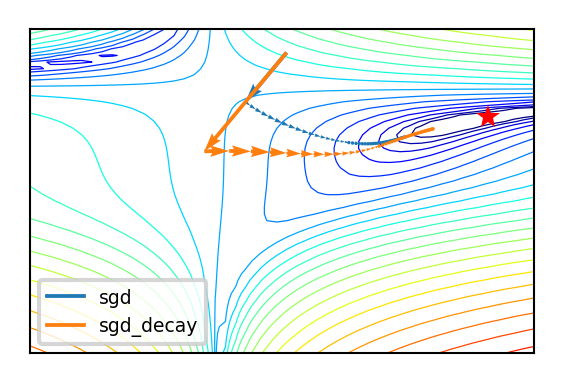

In [19]:
@interact
def compare_optimizers(iterations=(1,100,1), optimizer1=opt_names, optimizer2=opt_names):
    fig, ax = plt.subplots(figsize=(6*fig_scale,4*fig_scale))
    plot_optimizers(ax,iterations,[optimizer1,optimizer2])
    
if not interactive:
    compare_optimizers(iterations=50, optimizer1="sgd", optimizer2="sgd_decay")

In two dimensions:

![](img/01_gradient_descent_2D.png)

* You can get stuck in local minima (if the loss is not fully convex)
    * If you have many model parameters, this is less likely
    * You always find a way down in some direction
    * Models with many parameters typically find good local minima

* Intuition: walking downhill using only the slope you "feel" nearby

![](img/01_gradient_descent_hill.png)

(Image by A. Karpathy)

#### Stochastic Gradient Descent (SGD)
* Compute gradients not on the entire dataset, but on a single data point $i$ at a time
    * Gradient descent: $\mathbf{w}^{s+1} = \mathbf{w}^s-\eta\nabla \mathcal{L}(\mathbf{w}^s) = \mathbf{w}^s-\frac{\eta}{n} \sum_{i=1}^{n} \nabla \mathcal{L_i}(\mathbf{w}^s)$
    * Stochastic Gradient Descent: $\mathbf{w}^{s+1} = \mathbf{w}^s-\eta\nabla \mathcal{L_i}(\mathbf{w}^s)$
* Many smoother variants, e.g.
    * Minibatch SGD: compute gradient on batches of data: $\mathbf{w}^{s+1} = \mathbf{w}^s-\frac{\eta}{B} \sum_{i=1}^{B} \nabla \mathcal{L_i}(\mathbf{w}^s)$
    * Stochastic Average Gradient Descent ([SAG](https://link.springer.com/content/pdf/10.1007/s10107-016-1030-6.pdf)). With $i_s \in [1,n]$ randomly chosen per iteration:
        * Incremental gradient: $\mathbf{w}^{s+1} = \mathbf{w}^s-\frac{\eta}{n} \sum_{i=1}^{n} v_i^s$ with $v_i^s = \begin{cases}\nabla \mathcal{L_i}(\mathbf{w}^s) & i = i_s \\ v_i^{s-1} & \text{otherwise} \end{cases}$
        

![](img/08_SGD.png)

#### In practice
* Linear regression can be found in `sklearn.linear_model`. We'll evaluate it on the Boston Housing dataset.
    * `LinearRegression` uses closed form solution, `SGDRegressor` with `loss='squared_loss'` uses Stochastic Gradient Descent
    * Large coefficients signal overfitting
    * Test score is much lower than training score

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_B, y_B = mglearn.datasets.load_extended_boston()
X_B_train, X_B_test, y_B_train, y_B_test = train_test_split(X_B, y_B, random_state=0)

lr = LinearRegression().fit(X_B_train, y_B_train)

In [21]:
print("Weights (coefficients): {}".format(lr.coef_[0:40]))
print("Bias (intercept): {}".format(lr.intercept_))

Weights (coefficients): [ -412.711   -52.243  -131.899   -12.004   -15.511    28.716    54.704
   -49.535    26.582    37.062   -11.828   -18.058   -19.525    12.203
  2980.781  1500.843   114.187   -16.97     40.961   -24.264    57.616
  1278.121 -2239.869   222.825    -2.182    42.996   -13.398   -19.389
    -2.575   -81.013     9.66      4.914    -0.812    -7.647    33.784
   -11.446    68.508   -17.375    42.813     1.14 ]
Bias (intercept): 30.934563673643545


In [22]:
print("Training set score (R^2): {:.2f}".format(lr.score(X_B_train, y_B_train)))
print("Test set score (R^2): {:.2f}".format(lr.score(X_B_test, y_B_test)))

Training set score (R^2): 0.95
Test set score (R^2): 0.61



### Ridge regression
* Adds a penalty term to the least squares loss function:

$$\mathcal{L}_{Ridge} = \sum_{n=1}^{N} (y_n-(\mathbf{w}\mathbf{x_n} + w_0))^2 + \alpha \sum_{i=1}^{p} w_i^2$$ 

* Model is penalized if it uses large coefficients ($w$)
    * Each feature should have as little effect on the outcome as possible 
    * We don't want to penalize $w_0$, so we leave it out
* Regularization: explicitly restrict a model to avoid overfitting. 
    * Called L2 regularization because it uses the L2 norm: $\sum w_i^2$
* The strength of the regularization can be controlled with the $\alpha$ hyperparameter.
    * Increasing $\alpha$ causes more regularization (or shrinkage). Default is 1.0.
* Still convex. Can be optimized in different ways:
    * Closed form solution (a.k.a. Cholesky): $w^{*} = (X^{T}X + \alpha I)^{-1} X^T \mathbf{y}$
    * Gradient descent and variants, e.g. Stochastic Average Gradient (SAG,SAGA)
        * Conjugate gradient (CG): each new gradient is influenced by previous ones
    * Use Cholesky for smaller datasets, Gradient descent for larger ones
   

### Ridge Regression Derivation

We want to minimize the Ridge loss function with respect to $\mathbf{w}$:

$$||X\mathbf{w} - \mathbf{y}||_2^2 + \alpha ||\mathbf{w}||_2^2$$

Expanding:

$$
\begin{aligned}
\mathcal{L}_{Ridge} &= ||X\mathbf{w} - \mathbf{y}||_2^2 + \alpha ||\mathbf{w}||_2^2\\
&= (X\mathbf{w} - \mathbf{y})^T (X\mathbf{w} - \mathbf{y}) + \alpha \mathbf{w}^T \mathbf{w} \\
&= \mathbf{w}^T X^T X \mathbf{w} - 2 \mathbf{y}^T X \mathbf{w} + \mathbf{y}^T \mathbf{y} + \alpha \mathbf{w}^T \mathbf{w}
\end{aligned}
$$

Taking the derivative with respect to $\mathbf{w}$:

$$
\begin{aligned}
\frac{\partial \mathcal{L}_{Ridge}}{\partial \mathbf{w}} &= 2 X^T X \mathbf{w} - 2 X^T \mathbf{y} + 2 \alpha \mathbf{w}
\end{aligned}
$$

Setting the derivative equal to zero:

$$
\begin{aligned}
&2 X^T X \mathbf{w} - 2 X^T \mathbf{y} + 2 \alpha \mathbf{w} = 0\\
\Rightarrow & X^T X \mathbf{w} + \alpha \mathbf{w} = X^T \mathbf{y}\\
\Rightarrow & (X^T X + \alpha I) \mathbf{w} = X^T \mathbf{y}\\
\Rightarrow & \mathbf{w} = (X^T X + \alpha I)^{-1} X^T \mathbf{y}
\end{aligned}
$$



#### In practice
``` python
from sklearn.linear_model import Ridge
lr = Ridge().fit(X_train, y_train)
```

In [23]:
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_B_train, y_B_train)
print("Weights (coefficients): {}".format(ridge.coef_[0:40]))
print("Bias (intercept): {}".format(ridge.intercept_))
print("Training set score: {:.2f}".format(ridge.score(X_B_train, y_B_train)))
print("Test set score: {:.2f}".format(ridge.score(X_B_test, y_B_test)))

Weights (coefficients): [-1.414 -1.557 -1.465 -0.127 -0.079  8.332  0.255 -4.941  3.899 -1.059
 -1.584  1.051 -4.012  0.334  0.004 -0.849  0.745 -1.431 -1.63  -1.405
 -0.045 -1.746 -1.467 -1.332 -1.692 -0.506  2.622 -2.092  0.195 -0.275
  5.113 -1.671 -0.098  0.634 -0.61   0.04  -1.277 -2.913  3.395  0.792]
Bias (intercept): 21.390525958610052
Training set score: 0.89
Test set score: 0.75


Test set score is higher and training set score lower: less overfitting!

* We can plot the weight values for differents levels of regularization to explore the effect of $\alpha$.
* Increasing regularization decreases the values of the coefficients, but never to 0.

interactive(children=(FloatSlider(value=5.0, description='alpha', max=10.0, step=1.0), Output()), _dom_classes…

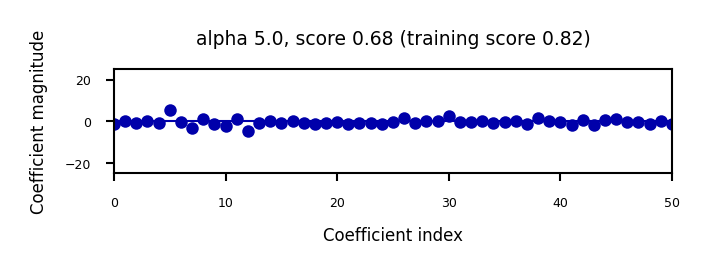

In [24]:
from __future__ import print_function
import ipywidgets as widgets
from ipywidgets import interact, interact_manual
from sklearn.linear_model import Ridge

@interact
def plot_ridge(alpha=(0,10.0,1)):
    r = Ridge(alpha=alpha).fit(X_B_train, y_B_train)
    fig, ax = plt.subplots(figsize=(8*fig_scale,1.5*fig_scale))
    ax.plot(r.coef_, 'o', markersize=3)
    ax.set_title("alpha {}, score {:.2f} (training score {:.2f})".format(alpha, r.score(X_B_test, y_B_test), r.score(X_B_train, y_B_train)))
    ax.set_xlabel("Coefficient index")
    ax.set_ylabel("Coefficient magnitude")
    ax.hlines(0, 0, len(r.coef_))
    ax.set_ylim(-25, 25)
    ax.set_xlim(0, 50)

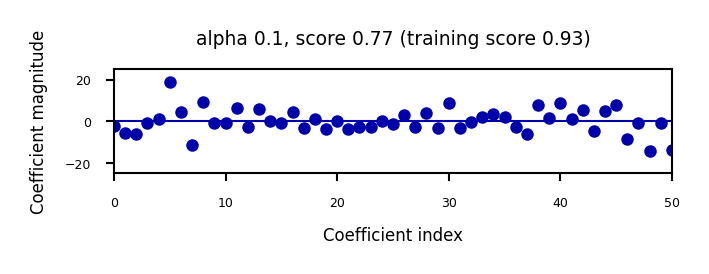

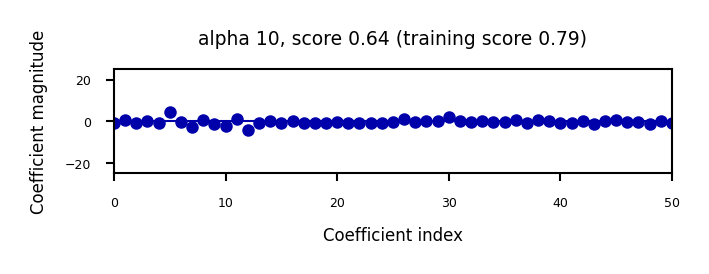

In [25]:
if not interactive:
    for alpha in [0.1, 10]:
        plot_ridge(alpha)

* When we plot the train and test scores for every $\alpha$ value, we see a sweet spot around $\alpha=0.2$
    * Models with smaller $\alpha$ are overfitting
    * Models with larger $\alpha$ are underfitting

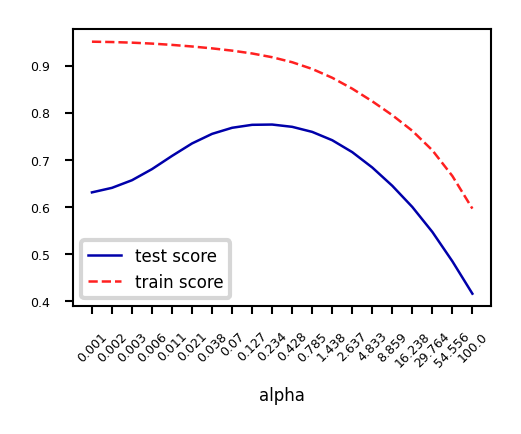

In [26]:
alpha=np.logspace(-3,2,num=20)
ai = list(range(len(alpha)))
test_score=[]
train_score=[]
for a in alpha:
    r = Ridge(alpha=a).fit(X_B_train, y_B_train)
    test_score.append(r.score(X_B_test, y_B_test))
    train_score.append(r.score(X_B_train, y_B_train))
fig, ax = plt.subplots(figsize=(6*fig_scale,4*fig_scale))
ax.set_xticks(range(20))
ax.set_xticklabels(np.round(alpha,3))
ax.set_xlabel('alpha')
ax.plot(test_score, lw=2*fig_scale, label='test score')
ax.plot(train_score, lw=2*fig_scale, label='train score')
ax.legend()
plt.xticks(rotation=45);

### Other ways to reduce overfitting
* Add more training data: with enough training data, regularization becomes less important
    * Ridge and ordinary least squares will have the same performance
* Use fewer features: remove unimportant ones or find a low-dimensional embedding (e.g. PCA)
    * Fewer coefficients to learn, reduces the flexibility of the model
* Scaling the data typically helps (and changes the optimal $\alpha$ value)

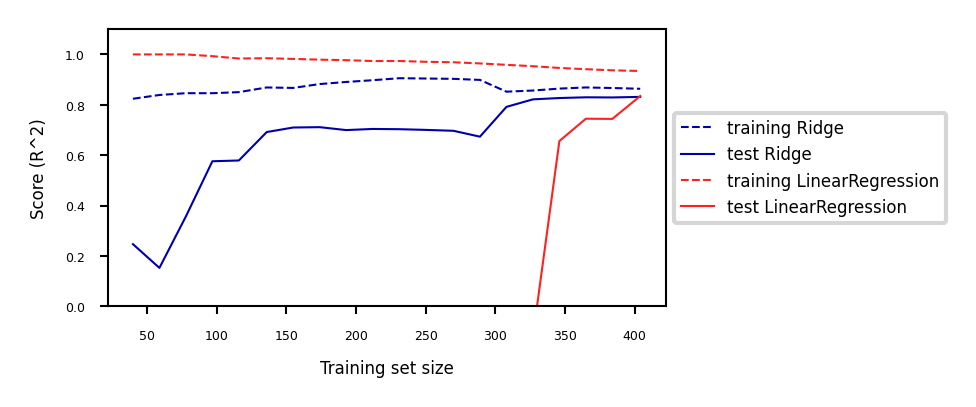

In [27]:
fig, ax = plt.subplots(figsize=(10*fig_scale,4*fig_scale))
mglearn.plots.plot_ridge_n_samples(ax)

### Lasso (Least Absolute Shrinkage and Selection Operator)
* Adds a different penalty term to the least squares sum:

$$\mathcal{L}_{Lasso} = \sum_{n=1}^{N} (y_n-(\mathbf{w}\mathbf{x_n} + w_0))^2 + \alpha \sum_{i=1}^{p} |w_i|$$

* Called L1 regularization because it uses the L1 norm
    * Will cause many weights to be exactly 0
* Same parameter $\alpha$ to control the strength of regularization. 
    * Will again have a 'sweet spot' depending on the data
* No closed-form solution
* Convex, but no longer strictly convex, and not differentiable
    * Weights can be optimized using _coordinate descent_

Analyze what happens to the weights:
* L1 prefers coefficients to be exactly zero (sparse models)
* Some features are ignored entirely: automatic feature selection
* How can we explain this?

interactive(children=(FloatSlider(value=0.25, description='alpha', max=0.5, step=0.005), Output()), _dom_class…

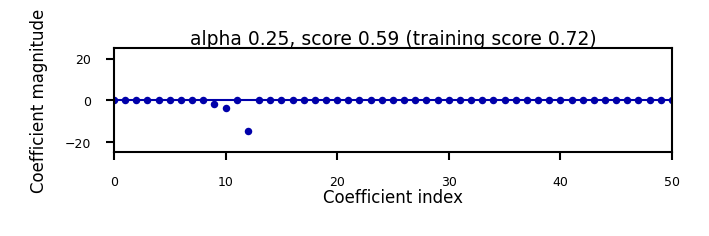

In [28]:
from sklearn.linear_model import Lasso

@interact
def plot_lasso(alpha=(0,0.5,0.005)):
    r = Lasso(alpha=alpha).fit(X_B_train, y_B_train)
    fig, ax = plt.subplots(figsize=(8*fig_scale,1.5*fig_scale))
    ax.plot(r.coef_, 'o', markersize=6*fig_scale)
    ax.set_title("alpha {}, score {:.2f} (training score {:.2f})".format(alpha, r.score(X_B_test, y_B_test), r.score(X_B_train, y_B_train)), pad=0.5)
    ax.set_xlabel("Coefficient index", labelpad=0)
    ax.set_ylabel("Coefficient magnitude")
    ax.hlines(0, 0, len(r.coef_))
    ax.set_ylim(-25, 25);
    ax.set_xlim(0, 50);

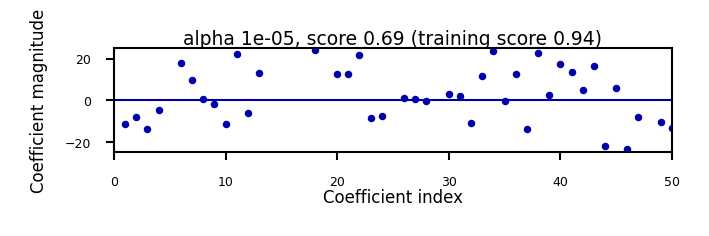

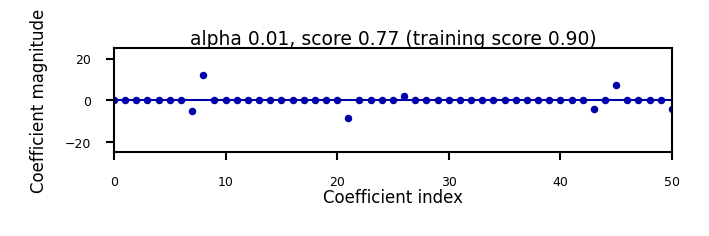

In [29]:
if not interactive:
    for alpha in [0.00001, 0.01]:
        plot_lasso(alpha)

#### Coordinate descent
- Alternative for gradient descent, supports non-differentiable convex loss functions (e.g. $\mathcal{L}_{Lasso}$)
- In every iteration, optimize a single coordinate $w_i$ (find minimum in direction of $x_i$)
    - Continue with another coordinate, using a selection rule (e.g. round robin)
- Faster iterations. No need to choose a step size (learning rate).
- May converge more slowly. Can't be parallellized.

<img src="https://raw.githubusercontent.com/fum-cs/machine-learning/main/notebooks/img/02_cd.png" alt="ml" style="width: 700px;"/>


---

#### Coordinate descent with Lasso (Further Reading)

- Remember that $\mathcal{L}_{Lasso} = \mathcal{L}_{SSE} + \alpha \sum_{i=1}^{p} |w_i|$ 
- For one $w_i$: $\mathcal{L}_{Lasso}(w_i) = \mathcal{L}_{SSE}(w_i) + \alpha |w_i|$
- The L1 term is not differentiable but convex: we can compute the [_subgradient_](https://towardsdatascience.com/unboxing-lasso-regularization-with-proximal-gradient-method-ista-iterative-soft-thresholding-b0797f05f8ea) 
    - Unique at points where $\mathcal{L}$ is differentiable, a range of all possible slopes [a,b] where it is not
    - For $|w_i|$, the subgradient $\partial_{w_i} |w_i|$ =  $\begin{cases}-1 & w_i<0\\ [-1,1] & w_i=0 \\ 1 & w_i>0 \\ \end{cases}$

    - Subdifferential $\partial(f+g) = \partial f + \partial g$ if $f$ and $g$ are both convex
- To find the optimum for Lasso $w_i^{*}$, solve

    $$\begin{aligned} \partial_{w_i} \mathcal{L}_{Lasso}(w_i) &= \partial_{w_i} \mathcal{L}_{SSE}(w_i) + \partial_{w_i} \alpha |w_i| \\ 0 &= (w_i - \rho_i) + \alpha \cdot \partial_{w_i} |w_i| \\ w_i &= \rho_i - \alpha \cdot \partial_{w_i} |w_i| \end{aligned}$$

    - In which $\rho_i$ is the part of $\partial_{w_i} \mathcal{L}_{SSE}(w_i)$ excluding $w_i$ (assume $z_i=1$ for now)
        - $\rho_i$ can be seen as the $\mathcal{L}_{SSE}$ 'solution': $w_i = \rho_i$ if $\partial_{w_i} \mathcal{L}_{SSE}(w_i) = 0$ 

  $$\partial_{w_i} \mathcal{L}_{SSE}(w_i) = \partial_{w_i} \sum_{n=1}^{N} (y_n-(\mathbf{w}\mathbf{x_n} + w_0))^2 = z_i w_i -\rho_i $$ 

- We found: $w_i = \rho_i - \alpha \cdot \partial_{w_i} |w_i|$
- [The Lasso solution](https://xavierbourretsicotte.github.io/lasso_derivation.html) has the form of a _soft thresholding function_ $S$

    $$w_i^* = S(\rho_i,\alpha) = \begin{cases} \rho_i + \alpha, & \rho_i < -\alpha \\  0, & -\alpha < \rho_i < \alpha \\ \rho_i - \alpha, & \rho_i > \alpha \\ \end{cases}$$
    
    - Small weights become 0: sparseness!
    - If the data is not normalized, $w_i^* = \frac{1}{z_i}S(\rho_i,\alpha)$ with constant $z_i = \sum_{n=1}^{N} x_{ni}^2$
- Ridge solution: $w_i = \rho_i - \alpha \cdot \partial_{w_i} w_i^2 = \rho_i - 2\alpha \cdot w_i$, thus $w_i^* = \frac{\rho_i}{1 + 2\alpha}$
- For mor information see {cite}`Rashidabadi2016image`

interactive(children=(FloatSlider(value=1.0, description='alpha', max=2.0, step=0.05), Output()), _dom_classes…

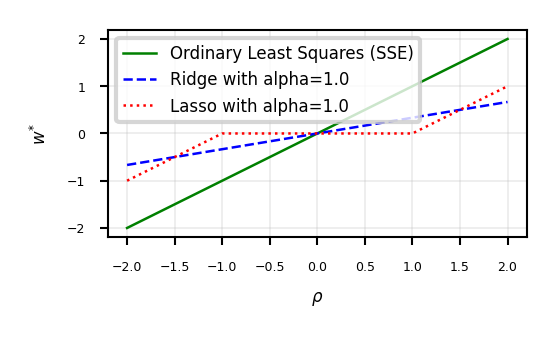

In [30]:
@interact
def plot_rho(alpha=(0,2.0,0.05)):
    w = np.linspace(-2,2,101)
    r = w/(1+2*alpha)
    l = [x+alpha if x <= -alpha else (x-alpha if x > alpha else 0) for x in w]
    fig, ax = plt.subplots(figsize=(6*fig_scale,3*fig_scale))
    ax.set_xlabel(r'$\rho$')
    ax.set_ylabel(r'$w^{*}$')
    ax.plot(w, w, lw=2*fig_scale, c='g', label='Ordinary Least Squares (SSE)')
    ax.plot(w, r, lw=2*fig_scale, c='b', label='Ridge with alpha={}'.format(alpha))
    ax.plot(w, l, lw=2*fig_scale, c='r', label='Lasso with alpha={}'.format(alpha))
    ax.legend()
    plt.grid()

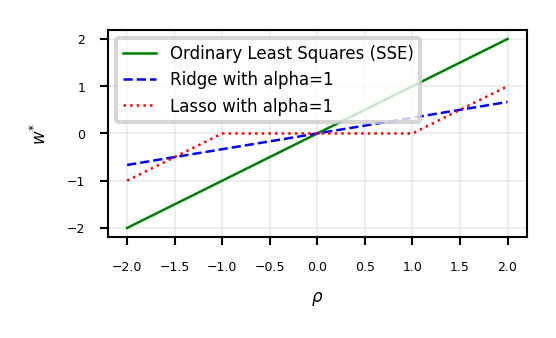

In [31]:
if not interactive:
    plot_rho(alpha=1)

### Interpreting L1 and L2 loss

<!-- - L1 and L2 in function of the weights

<img src="https://raw.githubusercontent.com/fum-cs/machine-learning/main/notebooks/img/L12_1.png" alt="ml" style="width: 900px;"/> -->

<!-- Least Squares Loss + L1 or L2
- Lasso is not differentiable at point 0
- For any minimum of least squares, L2 will be smaller, and L1 is more likely be 0 -->

interactive(children=(FloatSlider(value=0.5, description='alpha', max=1.0, step=0.05), Output()), _dom_classes…

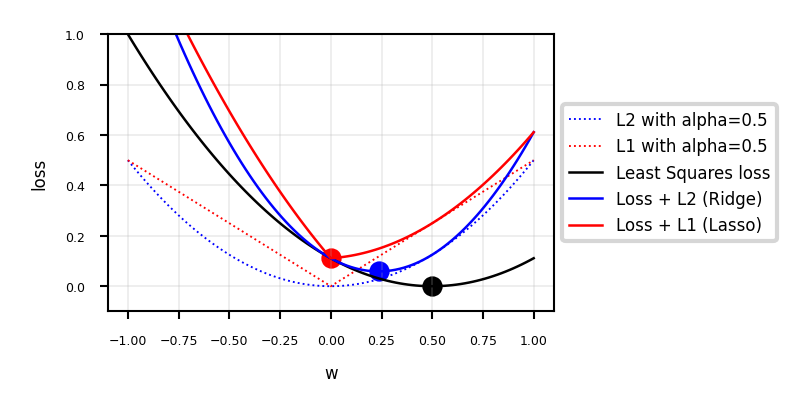

In [32]:
def c_fx(x):
    fX = ((x * 2 - 1)**2) # Some convex function to represent the loss
    return fX/9 # Scaling
def c_fl2(x,alpha):
    return c_fx(x) + alpha * x**2
def c_fl1(x,alpha):
    return c_fx(x) + alpha * abs(x)
def l2(x,alpha):
    return alpha * x**2
def l1(x,alpha):
    return alpha * abs(x)

@interact
def plot_losses(alpha=(0,1.0,0.05)):
    w = np.linspace(-1,1,101)
    f = [c_fx(i) for i in w]
    r = [c_fl2(i,alpha) for i in w]
    l = [c_fl1(i,alpha) for i in w]
    rp = [l2(i,alpha) for i in w]
    lp = [l1(i,alpha) for i in w]
    fig, ax = plt.subplots(figsize=(8*fig_scale,4*fig_scale))
    ax.set_xlabel('w')
    ax.set_ylabel('loss')
    ax.plot(w, rp, lw=1.5*fig_scale, ls=':', c='b', label='L2 with alpha={}'.format(alpha))
    ax.plot(w, lp, lw=1.5*fig_scale, ls=':', c='r', label='L1 with alpha={}'.format(alpha))
    ax.plot(w, f, lw=2*fig_scale, ls='-', c='k', label='Least Squares loss')
    ax.plot(w, r, lw=2*fig_scale, ls='-', c='b', label='Loss + L2 (Ridge)'.format(alpha))
    ax.plot(w, l, lw=2*fig_scale, ls='-', c='r', label='Loss + L1 (Lasso)'.format(alpha))
    opt_f = np.argmin(f)
    ax.scatter(w[opt_f], f[opt_f], c="k", s=50*fig_scale)
    opt_r = np.argmin(r)
    ax.scatter(w[opt_r], r[opt_r], c="b", s=50*fig_scale)
    opt_l = np.argmin(l)
    ax.scatter(w[opt_l], l[opt_l], c="r", s=50*fig_scale)
    ax.legend()
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.ylim(-0.1,1)
    plt.grid()

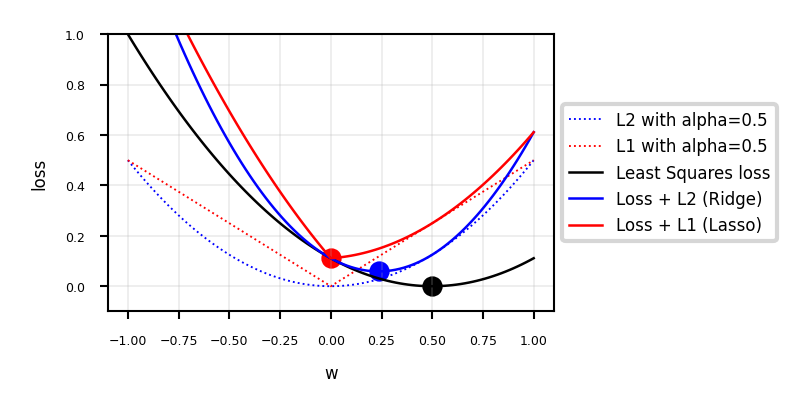

In [33]:
if not interactive:
    plot_losses(alpha=0.5)

  
---

- In 2D (for 2 model weights $w_1$ and $w_2$)
    - The least squared loss is a 2D convex function in this space
    - For illustration, assume that L1 loss = L2 loss = 1
        - L1 loss ($\Sigma |w_i|$): every {$w_1, w_2$} falls on the diamond
        - L2 loss ($\Sigma w_i^2$): every {$w_1, w_2$} falls on the circle
    - For L1, the loss is minimized if $w_1$ or $w_2$ is 0 (rarely so for L2)

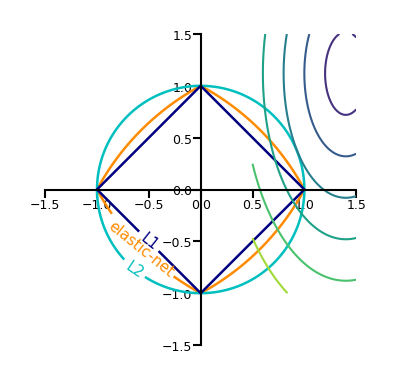

In [34]:
def plot_loss_interpretation():
    line = np.linspace(-1.5, 1.5, 1001)
    xx, yy = np.meshgrid(line, line)

    l2 = xx ** 2 + yy ** 2
    l1 = np.abs(xx) + np.abs(yy)
    rho = 0.7
    elastic_net = rho * l1 + (1 - rho) * l2

    plt.figure(figsize=(5*fig_scale, 4*fig_scale))
    ax = plt.gca()

    elastic_net_contour = plt.contour(xx, yy, elastic_net, levels=[1], linewidths=2*fig_scale, colors="darkorange")
    l2_contour = plt.contour(xx, yy, l2, levels=[1], linewidths=2*fig_scale, colors="c")
    l1_contour = plt.contour(xx, yy, l1, levels=[1], linewidths=2*fig_scale, colors="navy")
    ax.set_aspect("equal")
    ax.spines['left'].set_position('center')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('center')
    ax.spines['top'].set_color('none')

    plt.clabel(elastic_net_contour, inline=1, fontsize=12*fig_scale,
               fmt={1.0: 'elastic-net'}, manual=[(-0.6, -0.6)])
    plt.clabel(l2_contour, inline=1, fontsize=12*fig_scale,
               fmt={1.0: 'L2'}, manual=[(-0.5, -0.5)])
    plt.clabel(l1_contour, inline=1, fontsize=12*fig_scale,
               fmt={1.0: 'L1'}, manual=[(-0.5, -0.5)])

    x1 = np.linspace(0.5, 1.5, 100)
    x2 = np.linspace(-1.0, 1.5, 100)
    X1, X2 = np.meshgrid(x1, x2)
    y = np.sqrt(np.square(X1/2-0.7) + np.square(X2/4-0.28))
    cp = plt.contour(X1, X2, y)
    #plt.clabel(cp, inline=1, fontsize=10)
    ax.tick_params(axis='both', pad=0)

    plt.tight_layout()
    plt.show()
plot_loss_interpretation()

### Comparing Ridge and LASSO for Prediction and Feature Selection

The following code trains and compares Linear Regression, Ridge (L2), and LASSO (L1) regression models. We'll examine their predictive performance using Mean Squared Error (MSE) and observe how LASSO can be used for feature selection by shrinking some feature coefficients to zero.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import mglearn
import warnings
from sklearn.exceptions import InconsistentVersionWarning # More specific if available, or use UserWarning

# Suppress the specific UserWarning from _openml.py
warnings.filterwarnings("ignore", category=UserWarning, module="sklearn.datasets._openml")

# Load extended Boston dataset (with polynomial features)
X_B, y_B = mglearn.datasets.load_extended_boston()
X_B_train, X_B_test, y_B_train, y_B_test = train_test_split(X_B, y_B, random_state=0)

In [ ]:
# Train models
lr = LinearRegression().fit(X_B_train, y_B_train)
ridge = Ridge(alpha=0.2).fit(X_B_train, y_B_train)
lasso = Lasso(alpha=0.01, max_iter=5000).fit(X_B_train, y_B_train)  # Increased max_iter for convergence

# Compare errors
print("Linear Regression MSE:", mean_squared_error(y_B_test, lr.predict(X_B_test)))
print("Ridge MSE:", mean_squared_error(y_B_test, ridge.predict(X_B_test)))
print("LASSO MSE:", mean_squared_error(y_B_test, lasso.predict(X_B_test)))

# Feature selection with LASSO (non-zero coefficients)
feature_names = [f"Feature {i}" for i in range(X_B.shape[1])]
lasso_coef = pd.Series(lasso.coef_, index=feature_names)
lasso_nnz = len(lasso_coef[lasso_coef != 0])
print(f"\nLASSO selected {lasso_nnz} features from total {len(lasso_coef)} features.")


Linear Regression MSE: 32.06913512158206
Ridge MSE: 18.386795859109146
LASSO MSE: 19.145582778836758

LASSO selected 33 features from total 104 features.


### Elastic-Net

* Adds both L1 and L2 regularization:

$$\mathcal{L}_{Elastic} = \sum_{n=1}^{N} (y_n-(\mathbf{w}\mathbf{x_n} + w_0))^2 + \alpha \rho \sum_{i=1}^{p} |w_i| + \alpha (1 -  \rho) \sum_{i=1}^{p} w_i^2$$ 

* $\rho$ is the L1 ratio
    * With $\rho=1$, $\mathcal{L}_{Elastic} = \mathcal{L}_{Lasso}$
    * With $\rho=0$, $\mathcal{L}_{Elastic} = \mathcal{L}_{Ridge}$
    * $0 < \rho < 1$ sets a trade-off between L1 and L2.
* Allows learning sparse models (like Lasso) while maintaining L2 regularization benefits
    * E.g. if 2 features are correlated, Lasso likely picks one randomly, Elastic-Net keeps both 
* Weights can be optimized using coordinate descent (similar to Lasso) 

### Sparse Optimization: Theory and Applications
Sparse optimization is a fundamental paradigm in mathematical modeling that seeks solutions with few non-zero elements, often formalized through ℓ₁-norm regularization or non-convex penalties. This framework is grounded in the **Compressed Sensing (CS)** theory {cite}`Donoho2006CS`, which guarantees exact signal recovery from sub-Nyquist measurements if the signal is sparse in some basis. Key applications include:  

1. **Medical Imaging**: CS enables faster MRI scans by reconstructing images from limited k-space samples (Lustig et al., 2007), as highlighted in the [CUHK lecture notes on CS](http://dsp.ee.cuhk.edu.hk/eleg5481/Lecture%20notes/13-%20compressive%20sensing/cs.pdf) (p. 13).  
2. **Signal Processing**: Sparse methods underpin denoising (e.g., wavelet shrinkage) and inpainting, where total variation minimization preserves edges while removing noise (Figueiredo, 2021, [slides p. 8](https://indico.math.cnrs.fr/event/6637/contributions/5334/attachments/3055/3951/Figueiredo_CIMI-ANITI_Toulouse_2021.pdf)).  
3. **Machine Learning**: Sparse regression (e.g., LASSO; Tibshirani, 1996) and robust PCA (Candès et al., 2011) are critical for feature selection and anomaly detection. The [Ghent tutorial](https://telin.ugent.be/~sanja/Presentation/Tutorial_IMREC_Part1.pdf) (p. 5) further links sparsity to deep network pruning.  
4. **Statistics**: High-dimensional inference (e.g., genomics) benefits from sparsity-induced interpretability (Bühlmann & Van de Geer, 2011).  

The field continues to evolve with **non-convex penalties** (e.g., SCAD) and **greedy algorithms** (OMP), balancing computational efficiency and statistical guarantees. For a unified perspective, see the cited references and tutorials.  

---


## Sparse Signal Denoising via Weighted Lasso in DCT Domain

Given a noisy 1D signal:

$$
y(t) = f(t) + \epsilon(t)
$$

where:
- `f(t)` is the clean signal (sparse in frequency domain)
- `ϵ(t)` is Gaussian noise (non-sparse in any basis)

We solve the weighted Lasso problem:

$$
\min_x \|y - \text{IDCT}(x)\|^2_2 + \alpha \sum_{i>n_{freq}} |x_i|
$$


<!-- 

### 1. Signal Representation
```python
dct_coeffs = dct(signal, norm='ortho')
```
- **DCT Basis**: Chosen because real-world signals often have sparse frequency representations
- **Orthonormalization**: `norm='ortho'` preserves energy between time/frequency domains

### 2. Weighted Lasso Optimization
```python
penalty_weights = np.ones(len(signal))
penalty_weights[:n_freq] = 0  # Protect low frequencies
```
- **Frequency Protection**: Only penalize coefficients beyond `n_freq`
- **Adaptive Sparsity**: 
  - Low frequencies (signal components) remain unpenalized
  - High frequencies (noise-dominated) get sparsified

### 3. Algorithm Parameters
| Parameter | Role | Recommended Range |
|-----------|------|-------------------|
| `alpha` | Sparsity strength | 0.01-0.3 |
| `n_freq` | Protected coefficients | 10-50% of Nyquist |
| `max_iter` | Convergence control | ≥5000 | -->

### Noise-Sparsity Dichotomy
- **Signal**: Sparse in DCT domain (few dominant coefficients)
- **Noise**: Non-sparse (energy spread across all frequencies)

### Weighted ℓ₁ Magic
$$
\text{Effective penalty} = \alpha \sum_{i>n_{freq}} |x_i|
$$
- Preserves signal structure (low frequencies)
- Aggressively truncates noise (high frequencies)

### Performance Analysis
#### Theoretical Guarantees
- **Exact Recovery**: Possible if:
  - Signal truly sparse in DCT basis
  - Noise level below threshold (Donoho et al., 2006)
- **Stability**: Weighted Lasso provides better coefficient preservation than standard Lasso

### Limitations
- Assumes signal sparsity in chosen basis
- Requires tuning for each application
- Computationally heavier than simple filtering


<!-- The key innovation versus standard denoising is the **frequency-adaptive sparsity constraint**, which prevents the oversmoothing seen in the initial straight-line output. -->

**Signal Denoising using LASSO**

Total number of coefficients: 1000
Number of non-zero coefficients (NNZ): 25


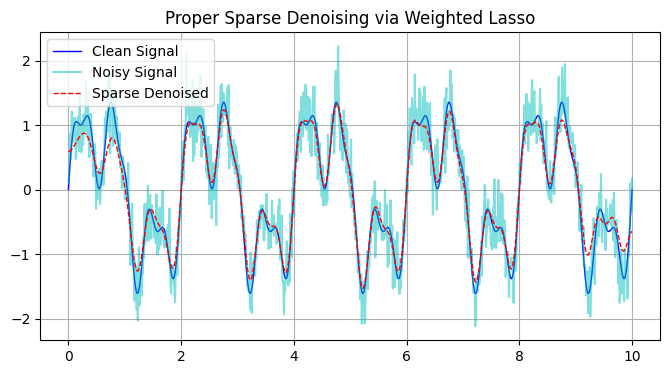

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import dct, idct
from sklearn.linear_model import Lasso

# Generate clean signal with multiple frequencies
np.random.seed(42)
t = np.linspace(0, 10, 1000)
f_clean = (np.sin(2*np.pi*0.5*t) + 
           0.7*np.sin(2*np.pi*1.5*t - 0.2) + 
           0.3*np.sin(2*np.pi*3*t + 0.5))

# Add noise
noise = 0.3 * np.random.randn(len(t))
f_noisy = f_clean + noise

def sparse_denoise(signal, alpha=0.05):
    """Denoise using Lasso in DCT domain with proper frequency retention"""
    # DCT transform (sparse representation)
    dct_coeffs = dct(signal, norm='ortho')
      
    model = Lasso(alpha=alpha, 
                  max_iter=10000,
                  warm_start=True,
                  selection='random')
    model.coef_ = dct_coeffs  # Initialize with DCT coeffs
    
    # Solve ||y - DCT^-1(x)||² + alpha * ||x||₁ 
    X = np.eye(len(signal))
    model.fit(X, dct_coeffs) 
    
    # Count total number of coefficients
    total_coefs = model.coef_.shape[0]
    # Count number of non-zero coefficients (NNZ)
    nnz_count = np.count_nonzero(model.coef_)
    
    print(f"Total number of coefficients: {total_coefs}")
    print(f"Number of non-zero coefficients (NNZ): {nnz_count}")
    
    return idct(model.coef_, norm='ortho')

# Denoise with proper parameters
f_denoised = sparse_denoise(f_noisy, alpha=0.0009)

# Plot
plt.figure(figsize=(8, 4))
plt.plot(t, f_clean, 'b-', lw=1, label='Clean Signal')
plt.plot(t, f_noisy, 'c-', alpha=0.5, label='Noisy Signal')
plt.plot(t, f_denoised, 'r--', lw=1, label='Sparse Denoised')
plt.legend()
plt.title('Proper Sparse Denoising via Weighted Lasso')
plt.grid(True)
plt.show()



# Orthogonal Matching Pursuit (OMP) for Sparse Recovery

**Orthogonal Matching Pursuit (OMP)** is a greedy algorithm that solves the sparse approximation problem:  

**Problem Statement**: Given a design matrix $X \in \mathbb{R}^{n \times p}$ (where typically $n \ll p$) and observations $\mathbf{y} \in \mathbb{R}^n$, find the sparsest vector $\mathbf{w} \in \mathbb{R}^p$ such that $\mathbf{y} \approx X\mathbf{w}$.  

**Key characteristics**:  
- Iterative approach that selects one feature per iteration based on maximum correlation  
- Provides exact recovery guarantees under Restricted Isometry Property (RIP) conditions  
- Computationally efficient ($O(knp)$ complexity) compared to $\ell_0$-norm minimization  
- Widely used in compressed sensing, signal processing, and feature selection  
- Preserves interpretability through explicit feature selection  

This method complements LASSO by offering an alternative approach to sparse recovery with distinct theoretical guarantees and computational trade-offs.  

While LASSO solves the $\ell_1$-regularized problem:

$$
\min_{\mathbf{w}} \frac{1}{2n} \|\mathbf{y} - X\mathbf{w}\|_2^2 + \alpha \|\mathbf{w}\|_1
$$

OMP provides a greedy alternative for sparse approximation, solving:

$$
\min_{\mathbf{w}} \|\mathbf{w}\|_0 \quad \text{subject to} \quad \|\mathbf{y} - X\mathbf{w}\|_2 \leq \epsilon
$$

## OMP algorithm

Given:
- Design matrix $X \in \mathbb{R}^{n \times p}$
- Response vector $\mathbf{y} \in \mathbb{R}^n$
- Target sparsity level $k$

At each iteration:

1. **Select most correlated feature**:
   $j = \arg\max_{j \notin \mathcal{A}} |\mathbf{x}_j^\top \mathbf{r}|$, 
   where $\mathbf{r}$ is the current residual and $\mathcal{A}$ is the active feature set.

2. **Update support**:
   $\mathcal{A} \leftarrow \mathcal{A} \cup \{j\}$

3. **Solve least squares**:
   $\mathbf{w} = \arg\min_{\mathbf{w}} \|X_{\mathcal{A}}\mathbf{w} - \mathbf{y}\|_2^2$

4. **Update residual**:
   $\mathbf{r} \leftarrow X_{\mathcal{A}}\mathbf{w} - \mathbf{y}$

Termination: After $k$ iterations or when $\|\mathbf{r}\|_2 < \epsilon$

![](img/theodoridis-Figure-10.2.png)

Figure 10.2 of {cite}`theodoridis2020machine`:

(A) In the case of an orthogonal matrix, the observations vector y will be orthogonal to any inactive column, here,
$x_3^c$. (B) In the more general case, it is expected to “lean” closer (form smaller angles) to the active than to the
inactive columns.

![](img/Bakhshali-Figure-2.3.png)

Figure 2.3 of {cite}`Bakhshali2018Sparse`

## Comparison with LASSO

| Property          | OMP                     | LASSO                   |
|-------------------|-------------------------|-------------------------|
| **Objective**     | $\ell_0$ constraint     | $\ell_1$ regularization |
| **Solution**      | Greedy approximation    | Convex optimization     |
| **Computational** | Faster for small $k$    | Slower but more stable  |
| **Theoretical**   | Exact recovery possible | Consistent estimation   |

For further information see {cite}`Asaran2016SR`.

### Practice

In [37]:
import numpy as np
from numpy.linalg import pinv

def omp(X, y, k, tol=1e-6):
    """
    Orthogonal Matching Pursuit
    
    Parameters
    ----------
    X : ndarray, shape (n_samples, n_features)
        Design matrix
    y : ndarray, shape (n_samples,)
        Target vector
    k : int
        Sparsity level (number of non-zero coefficients)
    tol : float
        Residual tolerance for early stopping
        
    Returns
    -------
    w : ndarray, shape (n_features,)
        Sparse coefficient vector
    """
    n, p = X.shape
    w = np.zeros(p)
    residual = y.copy()
    active = []
    
    for _ in range(k):
        # Find most correlated feature
        correlations = np.abs(X.T @ residual)
        correlations[active] = -np.inf  # exclude selected
        new_idx = np.argmax(correlations)
        active.append(new_idx)
        
        # Solve least squares on active set
        X_active = X[:, active]
        w_active = pinv(X_active) @ y
        
        # Update residual
        residual = y - X_active @ w_active
        
        # Early stopping if residual is small
        if np.linalg.norm(residual) < tol:
            break
    
    # Convert to full coefficient vector
    w_sparse = np.zeros(p)
    w_sparse[active] = w_active
    return w_sparse

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso

# Generate synthetic data
np.random.seed(42)
n, p = 100, 200
X = np.random.randn(n, p)
w_true = np.zeros(p)
w_true[[5, 45, 100]] = [1.5, -0.8, 1.2]
y = X @ w_true + 0.1 * np.random.randn(n)

# Split into train/test (80/20)
split_idx = int(0.8 * n)
X_train, X_test = X[:split_idx], X[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]

# --- Run OMP ---
w_omp = omp(X_train, y_train, k=3)

# --- Run LASSO ---
lasso = Lasso(alpha=0.1).fit(X_train, y_train)
w_lasso = lasso.coef_

# --- Evaluation Metrics ---
# Print ground truth for reference
true_nnz = w_true[w_true != 0]
print("\nGround Truth Non-zero Coefficients:", ", ".join([f"{val:.2f}" for val in true_nnz]))

print("\nPerformance Comparison:")
print(f"{'Method':<10} {'Test MSE':<12} {'Support Error':<15} {'ℓ2 Error':<10} {'Non-zero Coefficients':<30}")
print("-"*75)

for name, w in [('OMP', w_omp), ('LASSO', w_lasso)]:
    test_mse = np.mean((X_test @ w - y_test)**2)
    support_error = np.sum((w != 0) != (w_true != 0))
    l2_error = np.linalg.norm(w - w_true)
    nnz_values = w[w != 0]
    
    # Format NNZ values with 2 decimal places
    nnz_str = ", ".join([f"{val:.2f}" for val in nnz_values[:5]])  # Show first 5
    if len(nnz_values) > 5:
        nnz_str += ", ..."
    
    print(f"{name:<10} {test_mse:.4e}    {support_error:<15} {l2_error:<10.4f} [{nnz_str}]")



Ground Truth Non-zero Coefficients: 1.50, -0.80, 1.20

Performance Comparison:
Method     Test MSE     Support Error   ℓ2 Error   Non-zero Coefficients         
---------------------------------------------------------------------------
OMP        1.6293e-02    0               0.0296     [1.51, -0.80, 1.17]
LASSO      5.5046e-02    0               0.2214     [1.39, -0.68, 1.05]


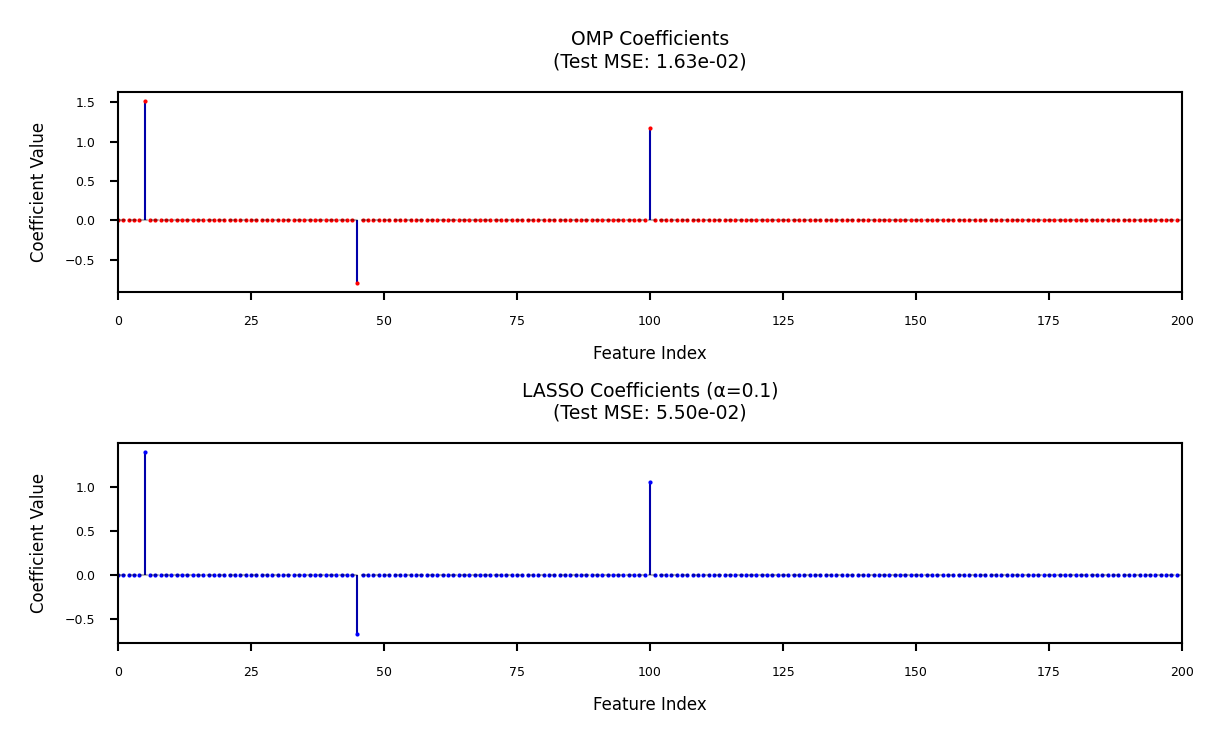

In [39]:
# --- Coefficient Visualization ---
plt.figure(figsize=(4, 8*fig_scale))

# OMP Plot
plt.subplot(2, 1, 1)
plt.stem(w_omp, markerfmt='ro', basefmt=" ")
plt.title(f"OMP Coefficients\n(Test MSE: {np.mean((X_test @ w_omp - y_test)**2):.2e})")
plt.xlabel("Feature Index")
plt.ylabel("Coefficient Value")
plt.axhline(0, color='k', linestyle='--', alpha=0.3)
plt.xlim(0, p)

# LASSO Plot
plt.subplot(2, 1, 2)
plt.stem(w_lasso, markerfmt='bo', basefmt=" ")
plt.title(f"LASSO Coefficients (α=0.1)\n(Test MSE: {np.mean((X_test @ w_lasso - y_test)**2):.2e})")
plt.xlabel("Feature Index")
plt.ylabel("Coefficient Value")
plt.axhline(0, color='k', linestyle='--', alpha=0.3)
plt.xlim(0, p)

plt.tight_layout()
plt.show()

## When to Use OMP
1. **Exactly sparse signals** – OMP is ideal when the underlying signal truly has only a few non-zero coefficients, making it a strong choice for enforcing strict sparsity.
2. **Small-scale problems** – Works efficiently when the number of non-zero elements $ k $ is much smaller than the total features $ p $ (i.e., $ k \ll p $), preventing unnecessary computational overhead.
3. **Interpretable solutions** – Since OMP selects features iteratively, the stepwise approach makes it easier to analyze which features contribute to the model, often simpler than interpreting LASSO’s continuous shrinkage.
4. **Dictionary learning** – Frequently used in sparse coding applications, where signals are represented as a **sparse combination of dictionary elements**, making it valuable for feature selection in compressed sensing.


## Connection Between Sparse Learning and Functional Analysis

Sparse recovery techniques like **OMP** and **LASSO** are deeply rooted in **functional analysis**, which explains why terms like **Hilbert spaces** and **Banach spaces** frequently appear in machine learning research. These mathematical frameworks provide the theoretical foundation for understanding sparsity-inducing methods.

### Hilbert Spaces and Orthogonal Projections
Hilbert spaces (complete inner product spaces) are essential for analyzing **orthogonal projections** and **basis expansions**. For example:  
- **OMP** iteratively projects the residual onto the span of selected basis vectors, leveraging the **orthogonality principle** to minimize error at each step.  
- The **inner product structure** of Hilbert spaces enables efficient computation of correlations between residuals and dictionary atoms (columns of $ X $).

### Banach Spaces and $ \ell_1 $-Regularization
**LASSO** operates in the context of Banach spaces (complete normed vector spaces) due to its reliance on the $ \ell_1 $-norm:  
- The $ \ell_1 $-norm’s **non-smoothness** at the origin induces sparsity, a property studied in Banach space geometry.  
- Unlike Hilbert spaces, Banach spaces generalize optimization techniques to **non-Euclidean settings**, crucial for sparse regularization.

### Fourier, Wavelet, and Other Representations 
Sparse learning often exploits **transform domains** (e.g., Fourier, wavelet, or learned dictionaries) where signals admit **concise representations**: - These domains provide **structured bases** where only a few coefficients are significant. - The **connection to functional analysis** arises because such bases typically form **frames** or **Riesz bases** in Hilbert spaces, ensuring stable sparse approximations.

## From Fixed Bases to Learned Representations
1. **Classical Sparse Coding**:  
   - Relies on **predefined bases** (e.g., Fourier, wavelets) where signals admit sparse representations.  
   - These bases often form **frames** or **Riesz bases** in Hilbert spaces, ensuring stable approximations.  

2. **Convolutional Neural Networks (CNNs)**:  
   - Learn **adaptive bases/filters** from data, implicitly constructing sparse-like representations through:  
     - **Local connectivity**: Filters act as localized basis functions.  
     - **Activation sparsity**: ReLU promotes de facto sparsity in feature maps.  
   - While CNNs lack explicit $ \ell_0 $/$ \ell_1 $ constraints, their hierarchical structure approximates **multi-scale sparse decompositions**, akin to wavelet analysis but data-driven.  

### The Evolving Role of Sparse Methods
While deep learning has reduced reliance on *handcrafted* sparse models in some domains, sparse methods remain relevant because:  

1. **Interpretability**:  
   - OMP/LASSO yield **explicit basis selections**, whereas CNNs operate as black boxes.  
   - Critical in fields like medicine or physics where model transparency is required.  

2. **Data-Efficiency**:  
   - Sparse methods often outperform DL in **low-data regimes** (e.g., medical imaging with small datasets).  

3. **Theoretical Guarantees**:  
   - Compressed sensing (**OMP**) and convex optimization (**LASSO**) provide **recovery guarantees** under precise conditions, unlike empirical DL results.  

4. **Hybrid Approaches**:  
   - Modern architectures (e.g., **ISTA-Net**, **Learned Iterative Shrinkage**) blend sparse priors with deep learning, showing that sparsity remains a useful *inductive bias*.  

 
Sparse learning and deep learning are complementary:  
- **CNNs** dominate when data is abundant and interpretability is secondary.  
- **OMP/LASSO** persist in scenarios requiring rigor, efficiency, or transparency.  
- **Functional analysis** bridges these paradigms, providing tools to analyze both fixed and learned representations.  




---

# MRI reconstruction (Further Reading)

MRI reconstruction can be formulated as an inverse problem where the goal is to recover the original image $ \mathbf{m} $ from under-sampled k-space measurements $ \mathbf{y} $. This is achieved using sparse optimization techniques.

A common formulation for MRI reconstruction is:

$$
\min_{\mathbf{m}} \|\mathbf{F}_u \mathbf{m} - \mathbf{y}\|_2^2 + \lambda \|\Psi \mathbf{m}\|_p
$$

where:
- $ \mathbf{m} $ represents the MRI image to be reconstructed.
- $ \mathbf{F}_u $ is the **under-sampled Fourier operator**, mapping the image to k-space.
- $ \mathbf{y} $ is the **acquired k-space data** (limited measurements).
- $ \Psi $ is the **sparsifying transform** (e.g., wavelet or total variation).
- $ \|\Psi \mathbf{m}\|_p $ represents the **sparsity constraint**, often chosen as $ \ell_1 $ (similar to LASSO) or $ \ell_0 $ (similar to OMP).
- $ \lambda $ controls the balance between data fidelity and sparsity enforcement.

By leveraging sparsity, MRI reconstruction enables faster scans with fewer measurements while preserving essential anatomical details.


## PyTomography

**PyTomography** is an open-source Python library designed for **medical image reconstruction**, particularly in **SPECT (Single-Photon Emission Computed Tomography)** and **PET (Positron Emission Tomography)** imaging. Developed to address the challenges of **quantitative tomographic reconstruction**, PyTomography provides a **flexible, modular framework** for implementing advanced reconstruction algorithms, including **attenuation correction, scatter correction, and resolution modeling**.  

### **Key Features**  
✅ **Open-source & community-driven** ([GitHub](https://github.com/PyTomography/PyTomography))  
✅ **Supports multiple reconstruction techniques** (OSEM, MLEM, deep learning-based methods)  
✅ **Integrates with GPU acceleration** for faster computations  
✅ **Well-documented** with tutorials and API references ([ReadTheDocs](https://pytomography.readthedocs.io/en/latest/))  
✅ **Validated in peer-reviewed research** ([Scientific Reports, 2024](https://www.sciencedirect.com/science/article/pii/S235271102400390X))  

### **Why Use PyTomography?**  
PyTomography bridges the gap between **research and clinical applications** by offering:  
- **Reproducible** reconstruction workflows  
- **Customizable** forward and backward projection models  
- **Seamless integration** with Python’s scientific computing stack (NumPy, PyTorch)  

Whether for **academic research, algorithm development, or clinical prototyping**, PyTomography provides a **powerful, accessible toolkit** for next-generation medical imaging reconstruction. 

## PySAP

The **Python Sparse data Analysis Package (PySAP)** was developed as part of COSMIC, a multi-disciplinary collaboration between **NeuroSpin**, experts in biomedical imaging, and **CosmoStat**, experts in astrophysical image processing. PySAP is designed to provide state-of-the-art signal processing tools for various imaging domains, including:

- **Astronomy**
- **Electron Tomography**
- **Magnetic Resonance Imaging (MRI)**

One of PySAP’s core contributions lies in **sparse optimization**, a powerful technique widely used for reconstructing images from incomplete or noisy data. The package implements advanced **compressed sensing algorithms**{cite}`theodoridis2020machine`, allowing efficient image restoration while preserving essential features.

In medical imaging, PySAP plays a crucial role in MRI reconstruction by leveraging **sparsity-based approaches** to improve scan efficiency. It enables:

- Reduced scanning time while maintaining image quality
- Improved reconstruction of under-sampled k-space data
- Integration of machine learning techniques for further enhancement

The first release of PySAP was presented in Farrens et al. {cite}`gueddari2020PySAP` and continues to evolve as a robust tool for sparse signal processing.

For further exploration, visit the [PySAP GitHub repository](https://github.com/CEA-COSMIC/pysap).

In our [deep learning course](http://fum-cs.github.io/dl), we will encounter additional examples of minimizing $ ||Ax - b|| $, including applications like image deblurring and super-resolution.


<!-- ### Other loss functions for regression
* Huber loss: switches from squared loss to linear loss past a value $\epsilon$
    * More robust against outliers
* Epsilon insensitive: ignores errors smaller than $\epsilon$, and linear past that
    * Aims to fit function so that residuals are at most $\epsilon$
    * Also known as Support Vector Regression (`SVR` in sklearn)
* Squared Epsilon insensitive: ignores errors smaller than $\epsilon$, and squared past that
* These can all be solved with stochastic gradient descent
    * `SGDRegressor` in sklearn

<img src="https://raw.githubusercontent.com/fum-cs/machine-learning/main/notebooks/img/huber.png" alt="ml" style="width: 500px;"/> -->

![](img/Rank-Based-Methods.jpg)

For valuable references on Ridge and Shrinkage methods, consider consulting Prof. Arashi's books {cite}`saleh2019theory,saleh2022rank`.

---


# Linear models for Classification 
Aims to find a hyperplane that separates the examples of each class.  
For binary classification (2 classes), we aim to fit the following function: 

$\hat{y} = w_1 * x_1 + w_2 * x_2 +... + w_p * x_p + w_0 > 0$  
    
When $\hat{y}<0$, predict class -1, otherwise predict class +1

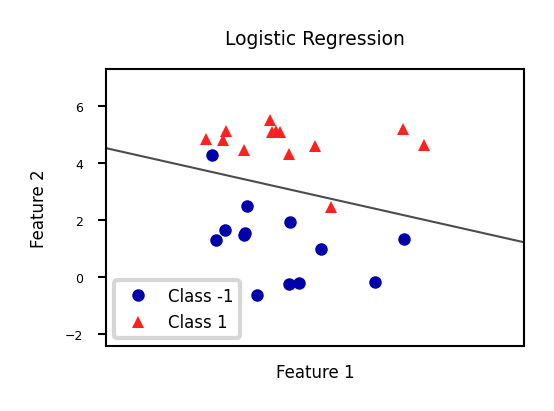

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

Xf, yf = mglearn.datasets.make_forge()
fig, ax = plt.subplots(figsize=(6*fig_scale,4*fig_scale))
clf = LogisticRegression().fit(Xf, yf)
mglearn.tools.plot_2d_separator(clf, Xf,
                                ax=ax, alpha=.7, cm=mglearn.cm2)
mglearn.discrete_scatter(Xf[:, 0], Xf[:, 1], yf, ax=ax, s=10*fig_scale)
ax.set_title("Logistic Regression")
ax.set_xlabel("Feature 1")
ax.set_ylabel("Feature 2")
ax.legend(['Class -1','Class 1']);

* There are many algorithms for linear classification, differing in loss function, regularization techniques, and optimization method

* Most common techniques:
    * Convert target classes {neg,pos} to {0,1} and treat as a regression task
        * Logistic regression (Log loss)
        * Ridge Classification (Least Squares + L2 loss)
    * Find hyperplane that maximizes the margin between classes
        * Linear Support Vector Machines (Hinge loss)
    * Neural networks without activation functions
        * Perceptron (Perceptron loss)
    * SGDClassifier: can act like any of these by choosing loss function
        * Hinge, Log, Modified_huber, Squared_hinge, Perceptron

### Logistic regression
* Aims to predict the _probability_ that a point belongs to the positive class
* Converts target values {negative (blue), positive (red)} to {0,1}
* Fits a _logistic_ (or _sigmoid_ or _S_ curve) function through these points
    * Maps (-Inf,Inf) to a probability [0,1]
    
    $$ \hat{y} = \textrm{logistic}(f_{\theta}(\mathbf{x})) = \frac{1}{1+e^{-f_{\theta}(\mathbf{x})}} $$
    
* E.g. in 1D: $ \textrm{logistic}(x_1w_1+w_0) = \frac{1}{1+e^{-x_1w_1-w_0}} $

interactive(children=(FloatSlider(value=-3.0, description='w0', max=5.0, min=-10.0, step=1.0), FloatSlider(val…

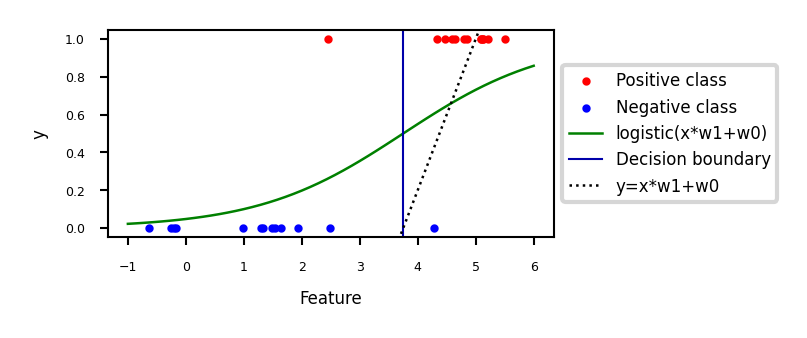

In [41]:
def sigmoid(x,w1,w0):
    return 1 / (1 + np.exp(-(x*w1+w0)))

@interact
def plot_logreg(w0=(-10.0,5.0,1),w1=(-1.0,3.0,0.3)):
    fig, ax = plt.subplots(figsize=(8*fig_scale,3*fig_scale))
    red = [Xf[i, 1] for i in range(len(yf)) if yf[i]==1]
    blue = [Xf[i, 1] for i in range(len(yf)) if yf[i]==0]
    ax.scatter(red, [1]*len(red), c='r', label='Positive class')
    ax.scatter(blue, [0]*len(blue), c='b', label='Negative class')
    x = np.linspace(min(-1, -w0/w1),max(6, -w0/w1))
    ax.plot(x,sigmoid(x,w1,w0),lw=2*fig_scale,c='g', label='logistic(x*w1+w0)'.format(np.round(w0,2),np.round(w1,2)))
    ax.axvline(x=(-w0/w1), ymin=0, ymax=1, label='Decision boundary')
    ax.plot(x,x*w1+w0,lw=2*fig_scale,c='k',linestyle=':', label='y=x*w1+w0')
    ax.set_xlabel("Feature")
    ax.set_ylabel("y")
    ax.set_ylim(-0.05,1.05)
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.8, box.height]);

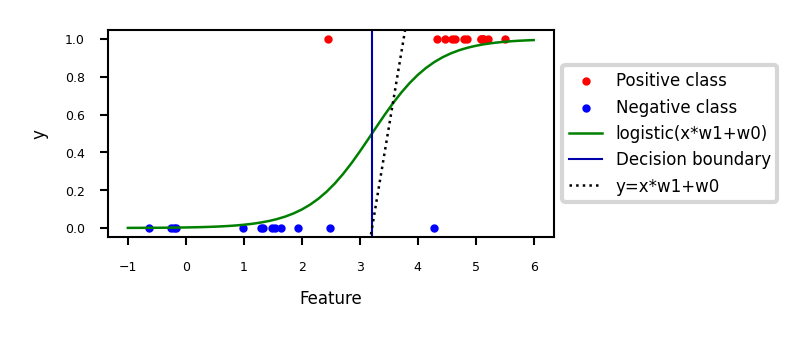

In [42]:
if not interactive:
    # fitted solution
    clf2 = LogisticRegression(C=100).fit(Xf[:, 1].reshape(-1, 1), yf)
    w0 = clf2.intercept_
    w1 = clf2.coef_[0][0]
    plot_logreg(w0=w0,w1=w1)

* Fitted solution to our 2D example:
    * To get a binary prediction, choose a probability threshold (e.g. 0.5)

In [43]:
lr_clf = LogisticRegression(C=100).fit(Xf, yf)

def sigmoid2d(x1,x2,w0,w1,w2):
    return 1 / (1 + np.exp(-(x2*w2+x1*w1+w0)))

@interact
def plot_logistic_fit(rotation=(0,360,10)):
    w0 = lr_clf.intercept_
    w1 = lr_clf.coef_[0][0]
    w2 = lr_clf.coef_[0][1]

    # plot surface of f
    fig = plt.figure(figsize=(7*fig_scale,5*fig_scale))
    ax = plt.axes(projection="3d")
    x0 = np.linspace(8, 16, 30)
    x1 = np.linspace(-1, 6, 30)
    X0, X1 = np.meshgrid(x0, x1)
    
    # Surface
    ax.plot_surface(X0, X1, sigmoid2d(X0, X1, w0, w1, w2), rstride=1, cstride=1,
                    cmap='bwr', edgecolor='none',alpha=0.5,label='sigmoid')
    # Points
    c=['b','r']
    ax.scatter3D(Xf[:, 0], Xf[:, 1], yf, c=[c[i] for i in yf], s=10*fig_scale)
    
    # Decision boundary
    # x2 = -(x1*w1 + w0)/w2
    ax.plot3D(x0,-(x0*w1 + w0)/w2,[0.5]*len(x0), lw=1*fig_scale, c='k', linestyle=':')
    z = np.linspace(0, 1, 31)
    XZ, Z = np.meshgrid(x0, z)
    YZ = -(XZ*w1 + w0)/w2    
    ax.plot_wireframe(XZ, YZ, Z, rstride=5, lw=1*fig_scale, cstride=5, alpha=0.3, color='k',label='decision boundary')
    ax.tick_params(axis='both', width=0, labelsize=10*fig_scale, pad=-4)

    ax.set_xlabel('x0', labelpad=-6)
    ax.set_ylabel('x1', labelpad=-6)
    ax.get_zaxis().set_ticks([])
    ax.view_init(30, rotation) # Use this to rotate the figure
    plt.tight_layout()
    #plt.legend() # Doesn't work yet, bug in matplotlib
    plt.show()

interactive(children=(IntSlider(value=180, description='rotation', max=360, step=10), Output()), _dom_classes=…

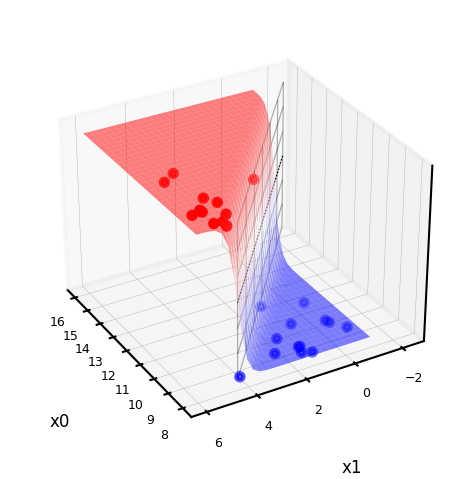

In [44]:
if not interactive:
    plot_logistic_fit(rotation=150)

#### Loss function: Cross-entropy (Further Reading)
* Models that return class probabilities can use _cross-entropy loss_
    
    $$\mathcal{L_{log}}(\mathbf{w}) = \sum_{n=1}^{N} H(p_n,q_n) = - \sum_{n=1}^{N} \sum_{c=1}^{C} p_{n,c} log(q_{n,c}) $$
    
    * Also known as log loss, logistic loss, or maximum likelihood
    * Based on true probabilities $p$ (0 or 1) and predicted probabilities $q$ over $N$ instances and $C$ classes
        * Binary case (C=2): $\mathcal{L_{log}}(\mathbf{w}) = - \sum_{n=1}^{N} \big[ y_n log(\hat{y}_n) + (1-y_n) log(1-\hat{y}_n) \big]$
    * Penalty (or surprise) grows exponentially as difference between $p$ and $q$ increases
    * Often used together with L2 (or L1) loss: $\mathcal{L_{log}}'(\mathbf{w}) = \mathcal{L_{log}}(\mathbf{w}) + \alpha \sum_{i} w_i^2 $
* We will see this loss function in [Deep Learning Course](http://fum-cs.github.io/dl)


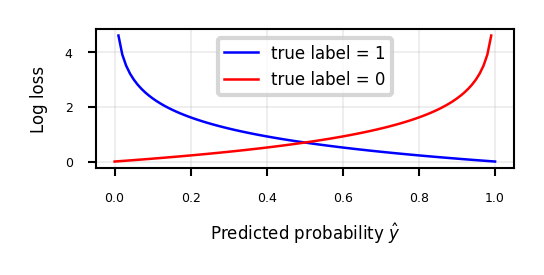

In [45]:
def cross_entropy(yHat, y):
    if y == 1:
        return -np.log(yHat)
    else:
        return -np.log(1 - yHat)

fig, ax = plt.subplots(figsize=(6*fig_scale,2*fig_scale))
x = np.linspace(0,1,100)

ax.plot(x,cross_entropy(x, 1),lw=2*fig_scale,c='b',label='true label = 1', linestyle='-')
ax.plot(x,cross_entropy(x, 0),lw=2*fig_scale,c='r',label='true label = 0', linestyle='-')
ax.set_xlabel(r"Predicted probability $\hat{y}$")
ax.set_ylabel("Log loss")
plt.grid()
plt.legend();

#### Optimization methods (solvers) for cross-entropy loss
* Gradient descent (only supports L2 regularization)
    - Log loss is differentiable, so we can use (stochastic) gradient descent
    - Variants thereof, e.g. Stochastic Average Gradient (SAG, SAGA)
* Coordinate descent (supports both L1 and L2 regularization)
    - Faster iteration, but may converge more slowly, has issues with saddlepoints
    - Called `liblinear` in sklearn. Can't run in parallel.
* Newton-Rhapson or Newton Conjugate Gradient (only L2):
    - Uses the Hessian $H = \big[\frac{\partial^2 \mathcal{L}}{\partial x_i \partial x_j} \big]$: $\mathbf{w}^{s+1} = \mathbf{w}^s-\eta H^{-1}(\mathbf{w}^s) \nabla \mathcal{L}(\mathbf{w}^s)$
    - Slow for large datasets. Works well if solution space is (near) convex
* Quasi-Newton methods (only L2)
    - Approximate, faster to compute
    - E.g. Limited-memory Broyden–Fletcher–Goldfarb–Shanno (`lbfgs`)
        - Default in sklearn for Logistic Regression
* For further information about conjugate gradients, see {cite}`Nemati2018Gradient`
* You will see many of these solvers in Optimization course taught by Dr. Ghanbari.


#### In practice
* Logistic regression can also be found in `sklearn.linear_model`.
    * `C` hyperparameter is the _inverse_ regularization strength: $C=\alpha^{-1}$
    * `penalty`: type of regularization: L1, L2 (default), Elastic-Net, or None
    * `solver`: newton-cg, lbfgs (default), liblinear, sag, saga
* Increasing C: less regularization, tries to overfit individual points

``` python
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=1).fit(X_train, y_train)
```

interactive(children=(FloatSlider(value=0.0, description='C_log', max=4.0, min=-3.0), Output()), _dom_classes=…

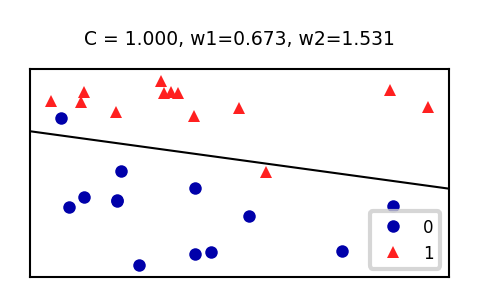

In [46]:
from sklearn.linear_model import LogisticRegression

@interact
def plot_lr(C_log=(-3,4,0.1)):
    # Still using artificial data
    fig, ax = plt.subplots(figsize=(6*fig_scale,3*fig_scale))
    mglearn.discrete_scatter(Xf[:, 0], Xf[:, 1], yf, ax=ax, s=10*fig_scale)
    lr = LogisticRegression(C=10**C_log).fit(Xf, yf)
    w = lr.coef_[0]
    xx = np.linspace(7, 13)
    yy = (-w[0] * xx - lr.intercept_[0]) / w[1]
    ax.plot(xx, yy, c='k')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title("C = {:.3f}, w1={:.3f}, w2={:.3f}".format(10**C_log,w[0],w[1]))
    ax.legend(loc="best");

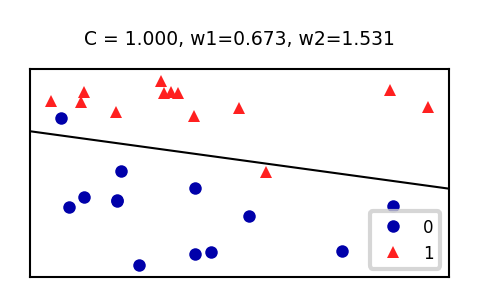

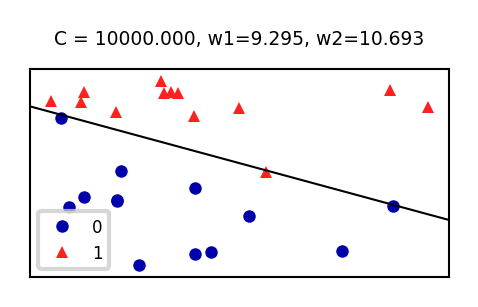

In [47]:
if not interactive:
    plot_lr(C_log=(0))
    plot_lr(C_log=(4))

* Analyze behavior on the breast cancer dataset
    * Underfitting if C is too small, some overfitting if C is too large
    * We use cross-validation because the dataset is small

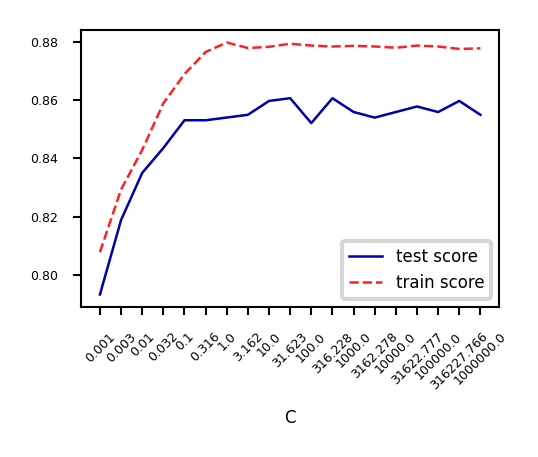

In [48]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import cross_validate

spam_data = fetch_openml(name="qsar-biodeg", as_frame=True)
X_C, y_C = spam_data.data, spam_data.target

C=np.logspace(-3,6,num=19)
test_score=[]
train_score=[]
for c in C:
    lr = LogisticRegression(C=c)
    scores = cross_validate(lr,X_C,y_C,cv=10, return_train_score=True)
    test_score.append(np.mean(scores['test_score']))
    train_score.append(np.mean(scores['train_score']))
fig, ax = plt.subplots(figsize=(6*fig_scale,4*fig_scale))
ax.set_xticks(range(19))
ax.set_xticklabels(np.round(C,3))
ax.set_xlabel('C')
ax.plot(test_score, lw=2*fig_scale, label='test score')
ax.plot(train_score, lw=2*fig_scale, label='train score')
ax.legend()
plt.xticks(rotation=45);

* Again, choose between L1 or L2 regularization (or elastic-net)
* Small C overfits, L1 leads to sparse models

interactive(children=(FloatSlider(value=499.91, description='C', max=1000.0, min=0.01), Dropdown(description='…

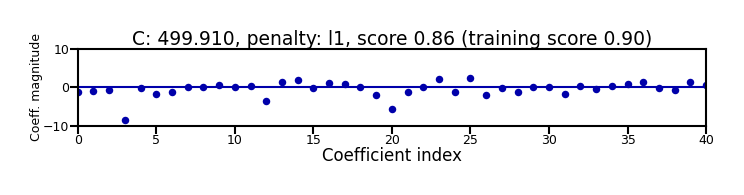

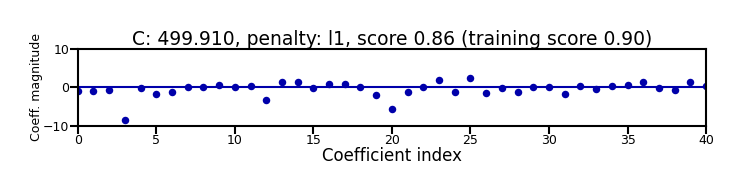

In [49]:
X_C_train, X_C_test, y_C_train, y_C_test = train_test_split(X_C, y_C, random_state=0)

@interact
def plot_logreg(C=(0.01,1000.0,0.1), penalty=['l1','l2']):
    r = LogisticRegression(C=C, penalty=penalty, solver='liblinear').fit(X_C_train, y_C_train)
    fig, ax = plt.subplots(figsize=(8*fig_scale,1.9*fig_scale))
    ax.plot(r.coef_.T, 'o', markersize=6*fig_scale)
    ax.set_title("C: {:.3f}, penalty: {}, score {:.2f} (training score {:.2f})".format(C, penalty, r.score(X_C_test, y_C_test), r.score(X_C_train, y_C_train)),pad=0)
    ax.set_xlabel("Coefficient index", labelpad=0)
    ax.set_ylabel("Coeff. magnitude", labelpad=0, fontsize=10*fig_scale)
    ax.tick_params(axis='both', pad=0)
    ax.hlines(0, 40, len(r.coef_)-1)
    ax.set_ylim(-10, 10)
    ax.set_xlim(0, 40);
    plt.tight_layout();

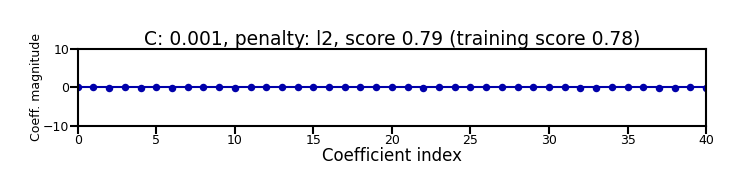

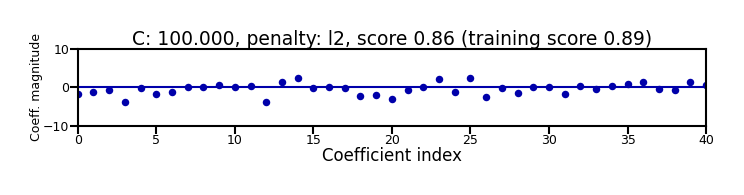

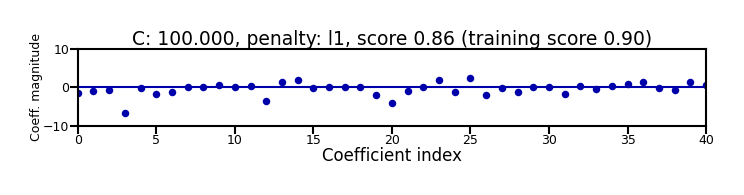

In [50]:
if not interactive:
    plot_logreg(0.001, 'l2')
    plot_logreg(100, 'l2')
    plot_logreg(100, 'l1')

**Note:**  Data scaling helps convergence, minimizes differences between solvers

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification

# Generate data with unscaled features
X, y = make_classification(n_features=2, n_redundant=0, random_state=42)
X[:, 1] *= 1000  # Artificially scale one feature

# Solvers to compare
solvers = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

# Without scaling
for solver in solvers:
    model = LogisticRegression(solver=solver, max_iter=1000)
    model.fit(X, y)
    print(f"{solver:10} → Iterations: {model.n_iter_[0]} (unscaled)")

# With scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
for solver in solvers:
    model = LogisticRegression(solver=solver, max_iter=1000)
    model.fit(X_scaled, y)
    print(f"{solver:10} → Iterations: {model.n_iter_[0]} (scaled)")

newton-cg  → Iterations: 19 (unscaled)
lbfgs      → Iterations: 43 (unscaled)
liblinear  → Iterations: 14 (unscaled)
sag        → Iterations: 1000 (unscaled)
saga       → Iterations: 1000 (unscaled)
newton-cg  → Iterations: 5 (scaled)
lbfgs      → Iterations: 7 (scaled)
liblinear  → Iterations: 5 (scaled)
sag        → Iterations: 21 (scaled)
saga       → Iterations: 12 (scaled)


### Ridge Classification
* Instead of log loss, we can also use ridge loss:
    
    $$\mathcal{L}_{Ridge} = \sum_{n=1}^{N} (y_n-(\mathbf{w}\mathbf{x_n} + w_0))^2 + \alpha \sum_{i=1}^{p} w_i^2$$
    
* In this case, target values {negative, positive} are converted to {-1,1}
* Can be solved similarly to Ridge regression:
    * Closed form solution (a.k.a. Cholesky)
    * Gradient descent and variants
        * E.g. Conjugate Gradient (CG) or Stochastic Average Gradient (SAG,SAGA)
    * Use Cholesky for smaller datasets, Gradient descent for larger ones


## Linear Models for multiclass classification
### one-vs-rest (aka one-vs-all)

* Learn a binary model for each class vs. all other classes
* Create as many binary models as there are classes

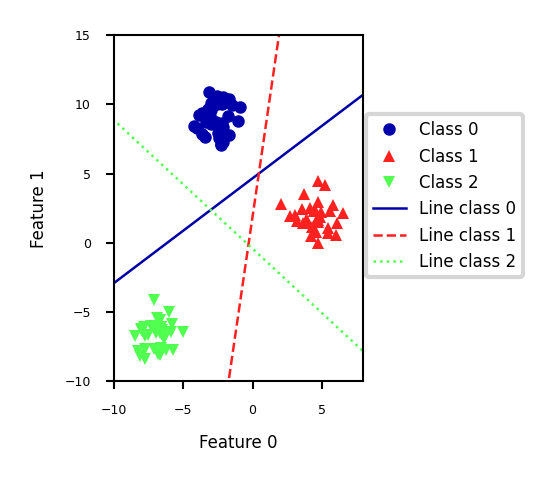

In [52]:
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=42)
linear_svm = LinearSVC().fit(X, y)

plt.rcParams["figure.figsize"] = (7*fig_scale,5*fig_scale)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y, s=10*fig_scale)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,
                                  mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color, lw=2*fig_scale)
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.gca().set_aspect('equal')
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1',
            'Line class 2'], loc=(1.01, 0.3))

* Every binary classifiers makes a prediction, the one with the highest score (>0) wins

Text(0, 0.5, 'Feature 1')

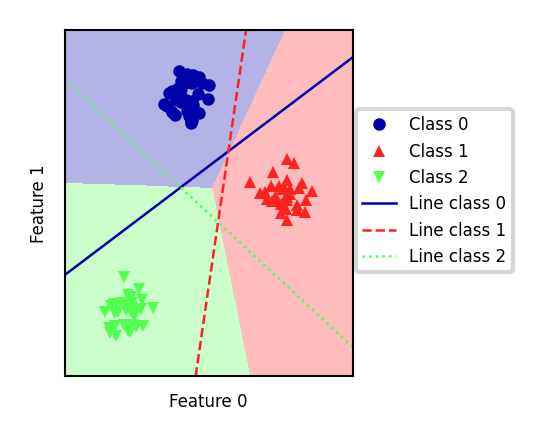

In [53]:
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=0.3)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y, s=10*fig_scale)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,
                                  mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color, lw=2*fig_scale)
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1',
            'Line class 2'], loc=(1.01, 0.3))
plt.gca().set_aspect('equal')
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

### one-vs-one
* An alternative is to learn a binary model for every _combination_ of two classes
    * For $C$ classes, this results in $\frac{C(C-1)}{2}$ binary models
    * Each point is classified according to a majority vote amongst all models
    * Can also be a 'soft vote': sum up the probabilities (or decision values) for all models. The class with the highest sum wins.
* Requires more models than one-vs-rest, but training each one is faster
    * Only the examples of 2 classes are included in the training data
* Recommended for algorithms than learn well on small datasets 
    * Especially SVMs and Gaussian Processes

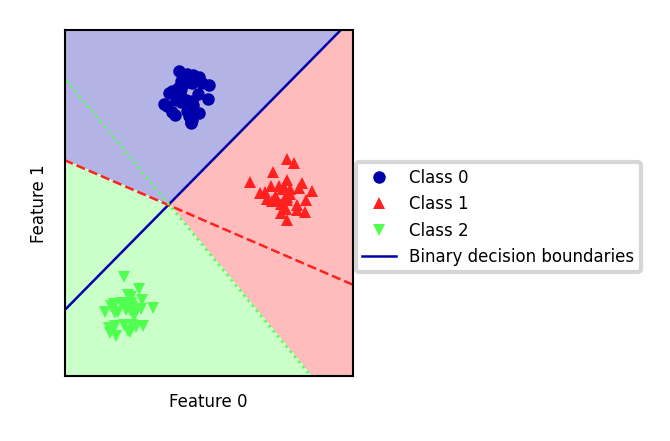

In [54]:
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.multiclass import OneVsOneClassifier
import mglearn

# Generate synthetic dataset
X, y = make_blobs(random_state=42)

# Apply One-vs-One classification using SVM
ovo_svm = OneVsOneClassifier(SVC(kernel="linear")).fit(X, y)

# Plot decision boundaries with one-vs-one classifier
mglearn.plots.plot_2d_classification(ovo_svm, X, fill=True, alpha=0.3)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y, s=10*fig_scale)

# Generate decision boundaries for each binary classifier
line = np.linspace(-15, 15)
for estimator, color in zip(ovo_svm.estimators_, mglearn.cm3.colors):
    coef = estimator.coef_[0]
    intercept = estimator.intercept_[0]
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color, lw=2*fig_scale)

# Set aspect ratio to ensure unit distances appear equal
plt.gca().set_aspect('equal')
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Binary decision boundaries'], loc=(1.01, 0.3))
plt.show()


In [55]:
%%HTML
<style>
td {font-size: 16px}
th {font-size: 16px}
.rendered_html table, .rendered_html td, .rendered_html th {
    font-size: 16px;
}
</style>

## Linear models overview

| Name | Representation | Loss function | Optimization | Regularization |
|---|---|---|---|---|
| Least squares    | Linear function (R) | SSE | CFS or SGD | None |
| Ridge | Linear function (R) | SSE + L2 | CFS or SGD | L2 strength ($\alpha$)  |
| Lasso | Linear function (R) | SSE + L1 | Coordinate descent   | L1 strength ($\alpha$)  |
| Elastic-Net | Linear function (R) | SSE + L1 + L2 | Coordinate descent   | $\alpha$, L1 ratio ($\rho$)  |
| SGDRegressor | Linear function (R) | SSE, Huber, $\epsilon$-ins,... + L1/L2 | SGD   | L1/L2, $\alpha$  |
| Logistic regression | Linear function (C) | Log + L1/L2 | SGD, coordinate descent,...   | L1/L2, $\alpha$ |
| Ridge classification | Linear function (C) | SSE + L2 | CFS or SGD   | L2 strength ($\alpha$) |
| Linear SVM | Support Vectors | Hinge(1) | Quadratic programming or SGD | Cost (C) |
| Least Squares SVM | Support Vectors | Squared Hinge | Linear equations or SGD | Cost (C) |
| Perceptron | Linear function (C) | Hinge(0) | SGD | None |
| SGDClassifier | Linear function (C) | Log, (Sq.) Hinge, Mod. Huber,... | SGD | L1/L2, $\alpha$ |

* SSE: Sum of Squared Errors
* CFS: Closed-form solution
* SGD: (Stochastic) Gradient Descent and variants
* (R)egression, (C)lassification

## Summary

- Linear models
    - Good for very large datasets (scalable)
    - Good for very high-dimensional data (not for low-dimensional data)
- Can be used to fit non-linear or low-dim patterns as well (see later)
    - Preprocessing: e.g. Polynomial or Poisson transformations
    - Generalized linear models (kernel trick)
- Regularization is important. Tune the regularization strength ($\alpha$)
    - Ridge (L2): Good fit, sometimes sensitive to outliers
    - Lasso (L1): Sparse models: fewer features, more interpretable, faster
    - Elastic-Net: Trade-off between both, e.g. for correlated features 
- Most can be solved by different optimizers (solvers)
    - Closed form solutions or quadratic/linear solvers for smaller datasets
    - Gradient descent variants (SGD,CD,SAG,CG,...) for larger ones
- Multi-class classification can be done using a one-vs-all approach

- Please refer to [Appendix](Appendix-Support-Vector-Machines.ipynb) for further information about SVM.